## Create visualizations for high wage jobs in California

Need to begin by specifying the desired year.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import squarify
import seaborn as sns
import string
import warnings
import os
import re
from datetime import datetime
from jqi_functions import *
import plotly.express as px
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format='retina'

In [2]:
year = '2020'
col_year = '2019'

In [4]:
data = pd.read_csv(f'data/outputs/hw_outputs_{year}.csv')

In [5]:
county_info = pd.read_csv('data/county_to_regions_key.csv')

In [7]:
cost_of_living = pd.read_csv(f'data/cost_of_living/united-way-col-1A1PS1C{col_year}.csv') # 1 adult, 1 preschooler, 1 child

In [10]:
data.head()

,Industry,Date,Region,High Wage Count,Employment Count,Cost of Living
0,accommodation and food services,2020-01-01,Inland Empire,18315,154200.0,63170
1,accommodation and food services,2020-02-01,Inland Empire,18623,156800.0,63170
2,accommodation and food services,2020-03-01,Inland Empire,18279,153900.0,63170
3,accommodation and food services,2020-04-01,Inland Empire,11354,95600.0,63170
4,accommodation and food services,2020-05-01,Inland Empire,12174,102500.0,63170


In [88]:
# data = data[['Industry', 'Date', 'County', 'CDI Regions', 'Rural/Urban', 'Population', 'High Wage Count', 'Employment Count', 'Cost of Living']]

In [89]:
# data['Population'] = normalize_titles(data['Population']).astype(int)

### Histogram of wages by industry

In [18]:
ca_ipums = cleaned_ipums(year)

In [19]:
ca_ipums.head()

,YEAR,COUNTYFIP,INDNAICS,PERWT,INCWAGE,NAICS Code,Industry Title,Industry,Crosswalk Value
0,2020,73,928110p4,79.0,62000,928110p4,us marines,us marines,36
1,2020,73,928110p4,64.0,24000,928110p4,us marines,us marines,36
2,2020,73,928110p4,66.0,30000,928110p4,us marines,us marines,36
3,2020,73,928110p4,58.0,24000,928110p4,us marines,us marines,36
4,2020,73,928110p4,75.0,20000,928110p4,us marines,us marines,36


In [20]:
ca_ipums_wages = ca_ipums.groupby(by=['Crosswalk Value']).mean()

In [21]:
ca_ipums_wages_regions = pd.merge(ca_ipums, county_info, on='COUNTYFIP').groupby(by=['Regions']).mean()

In [22]:
ca_ipums_minelog = ca_ipums.loc[(ca_ipums['Crosswalk Value'] == 1) |
                               (ca_ipums['Crosswalk Value'] == 3)]

ca_ipums_farm = ca_ipums.loc[(ca_ipums['Crosswalk Value'] == 2)]

ca_ipums_const = ca_ipums.loc[(ca_ipums['Crosswalk Value'] == 3) |
                             (ca_ipums['Crosswalk Value'] == 4) |
                             (ca_ipums['Crosswalk Value'] == 5) |
                             (ca_ipums['Crosswalk Value'] == 6) |
                             (ca_ipums['Crosswalk Value'] == 7)]

ca_ipums_manu = ca_ipums.loc[(ca_ipums['Crosswalk Value'] == 8) |
                            (ca_ipums['Crosswalk Value'] == 9) |
                            (ca_ipums['Crosswalk Value'] == 10)]

ca_ipums_ttu = ca_ipums.loc[(ca_ipums['Crosswalk Value'] == 11) |
                           (ca_ipums['Crosswalk Value'] == 12) |
                           (ca_ipums['Crosswalk Value'] == 13) |
                           (ca_ipums['Crosswalk Value'] == 14) |
                           (ca_ipums['Crosswalk Value'] == 15) |
                           (ca_ipums['Crosswalk Value'] == 16) |
                           (ca_ipums['Crosswalk Value'] == 17)]

ca_ipums_info = ca_ipums.loc[(ca_ipums['Crosswalk Value'] == 18)]

ca_ipums_fin = ca_ipums.loc[(ca_ipums['Crosswalk Value'] == 19) |
                           (ca_ipums['Crosswalk Value'] == 20) |
                           (ca_ipums['Crosswalk Value'] == 21)]

ca_ipums_prof = ca_ipums.loc[(ca_ipums['Crosswalk Value'] == 22) |
                            (ca_ipums['Crosswalk Value'] == 23) |
                            (ca_ipums['Crosswalk Value'] == 24) |
                            (ca_ipums['Crosswalk Value'] == 25)]

ca_ipums_eduhealth = ca_ipums.loc[(ca_ipums['Crosswalk Value'] == 26) |
                                 (ca_ipums['Crosswalk Value'] == 27) |
                                 (ca_ipums['Crosswalk Value'] == 28)]

ca_ipums_leisure = ca_ipums.loc[(ca_ipums['Crosswalk Value'] == 29) |
                               (ca_ipums['Crosswalk Value'] == 30) |
                               (ca_ipums['Crosswalk Value'] == 31)]

ca_ipums_other = ca_ipums.loc[(ca_ipums['Crosswalk Value'] == 32) |
                             (ca_ipums['Crosswalk Value'] == 33) |
                             (ca_ipums['Crosswalk Value'] == 34) |
                             (ca_ipums['Crosswalk Value'] == 35) |
                             (ca_ipums['Crosswalk Value'] == 0)]

ca_ipums_gov = ca_ipums.loc[(ca_ipums['Crosswalk Value'] == 36) |
                           (ca_ipums['Crosswalk Value'] == 37) |
                           (ca_ipums['Crosswalk Value'] == 38)]

In [23]:
main_ind_dfs = [ca_ipums_minelog, ca_ipums_farm, ca_ipums_const, ca_ipums_manu, ca_ipums_ttu, ca_ipums_info, ca_ipums_fin, ca_ipums_prof, ca_ipums_eduhealth, ca_ipums_leisure, ca_ipums_other, ca_ipums_gov]

In [24]:
main_ind_titles = ['Mining & Logging', 'Total Farm', 'Construction', 'Manufacturing', 'Trade, Transportation, & Utilities', 'Information', 'Financial Activities', 'Professional & Business Services', 'Educational & Health Services', 'Leisure & Hospitality', 'Other Services', 'Government']

In [30]:
def plot_hist(df_lists, titles):
    fig, ax = plt.subplots(6, 2, figsize=(24,30))
    plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
    n_col = 0
    n_row = 0
    for i in range(len(df_lists)):
        ax[n_row, n_col].hist(df_lists[i]['INCWAGE'], bins=50, color='#5797c2')
        ax[n_row, n_col].set_title(titles[i], fontsize=14, weight='bold', pad=20, color='#545454')
        ax[n_row, n_col].set_xlabel('Average Wage Per Industry', fontsize=12, weight='bold', color = '#545454')
        ax[n_row, n_col].xaxis.set_label_coords(0.15, -0.12)
        ax[n_row, n_col].spines['top'].set_visible(False)
        ax[n_row, n_col].spines['right'].set_visible(False)
        ax[n_row, n_col].spines['bottom'].set_linewidth(0.5)
        ax[n_row, n_col].spines['left'].set_linewidth(0.5)
        n_col += 1
        if n_col == 2:
            n_col = 0
            n_row += 1
    plt.show()

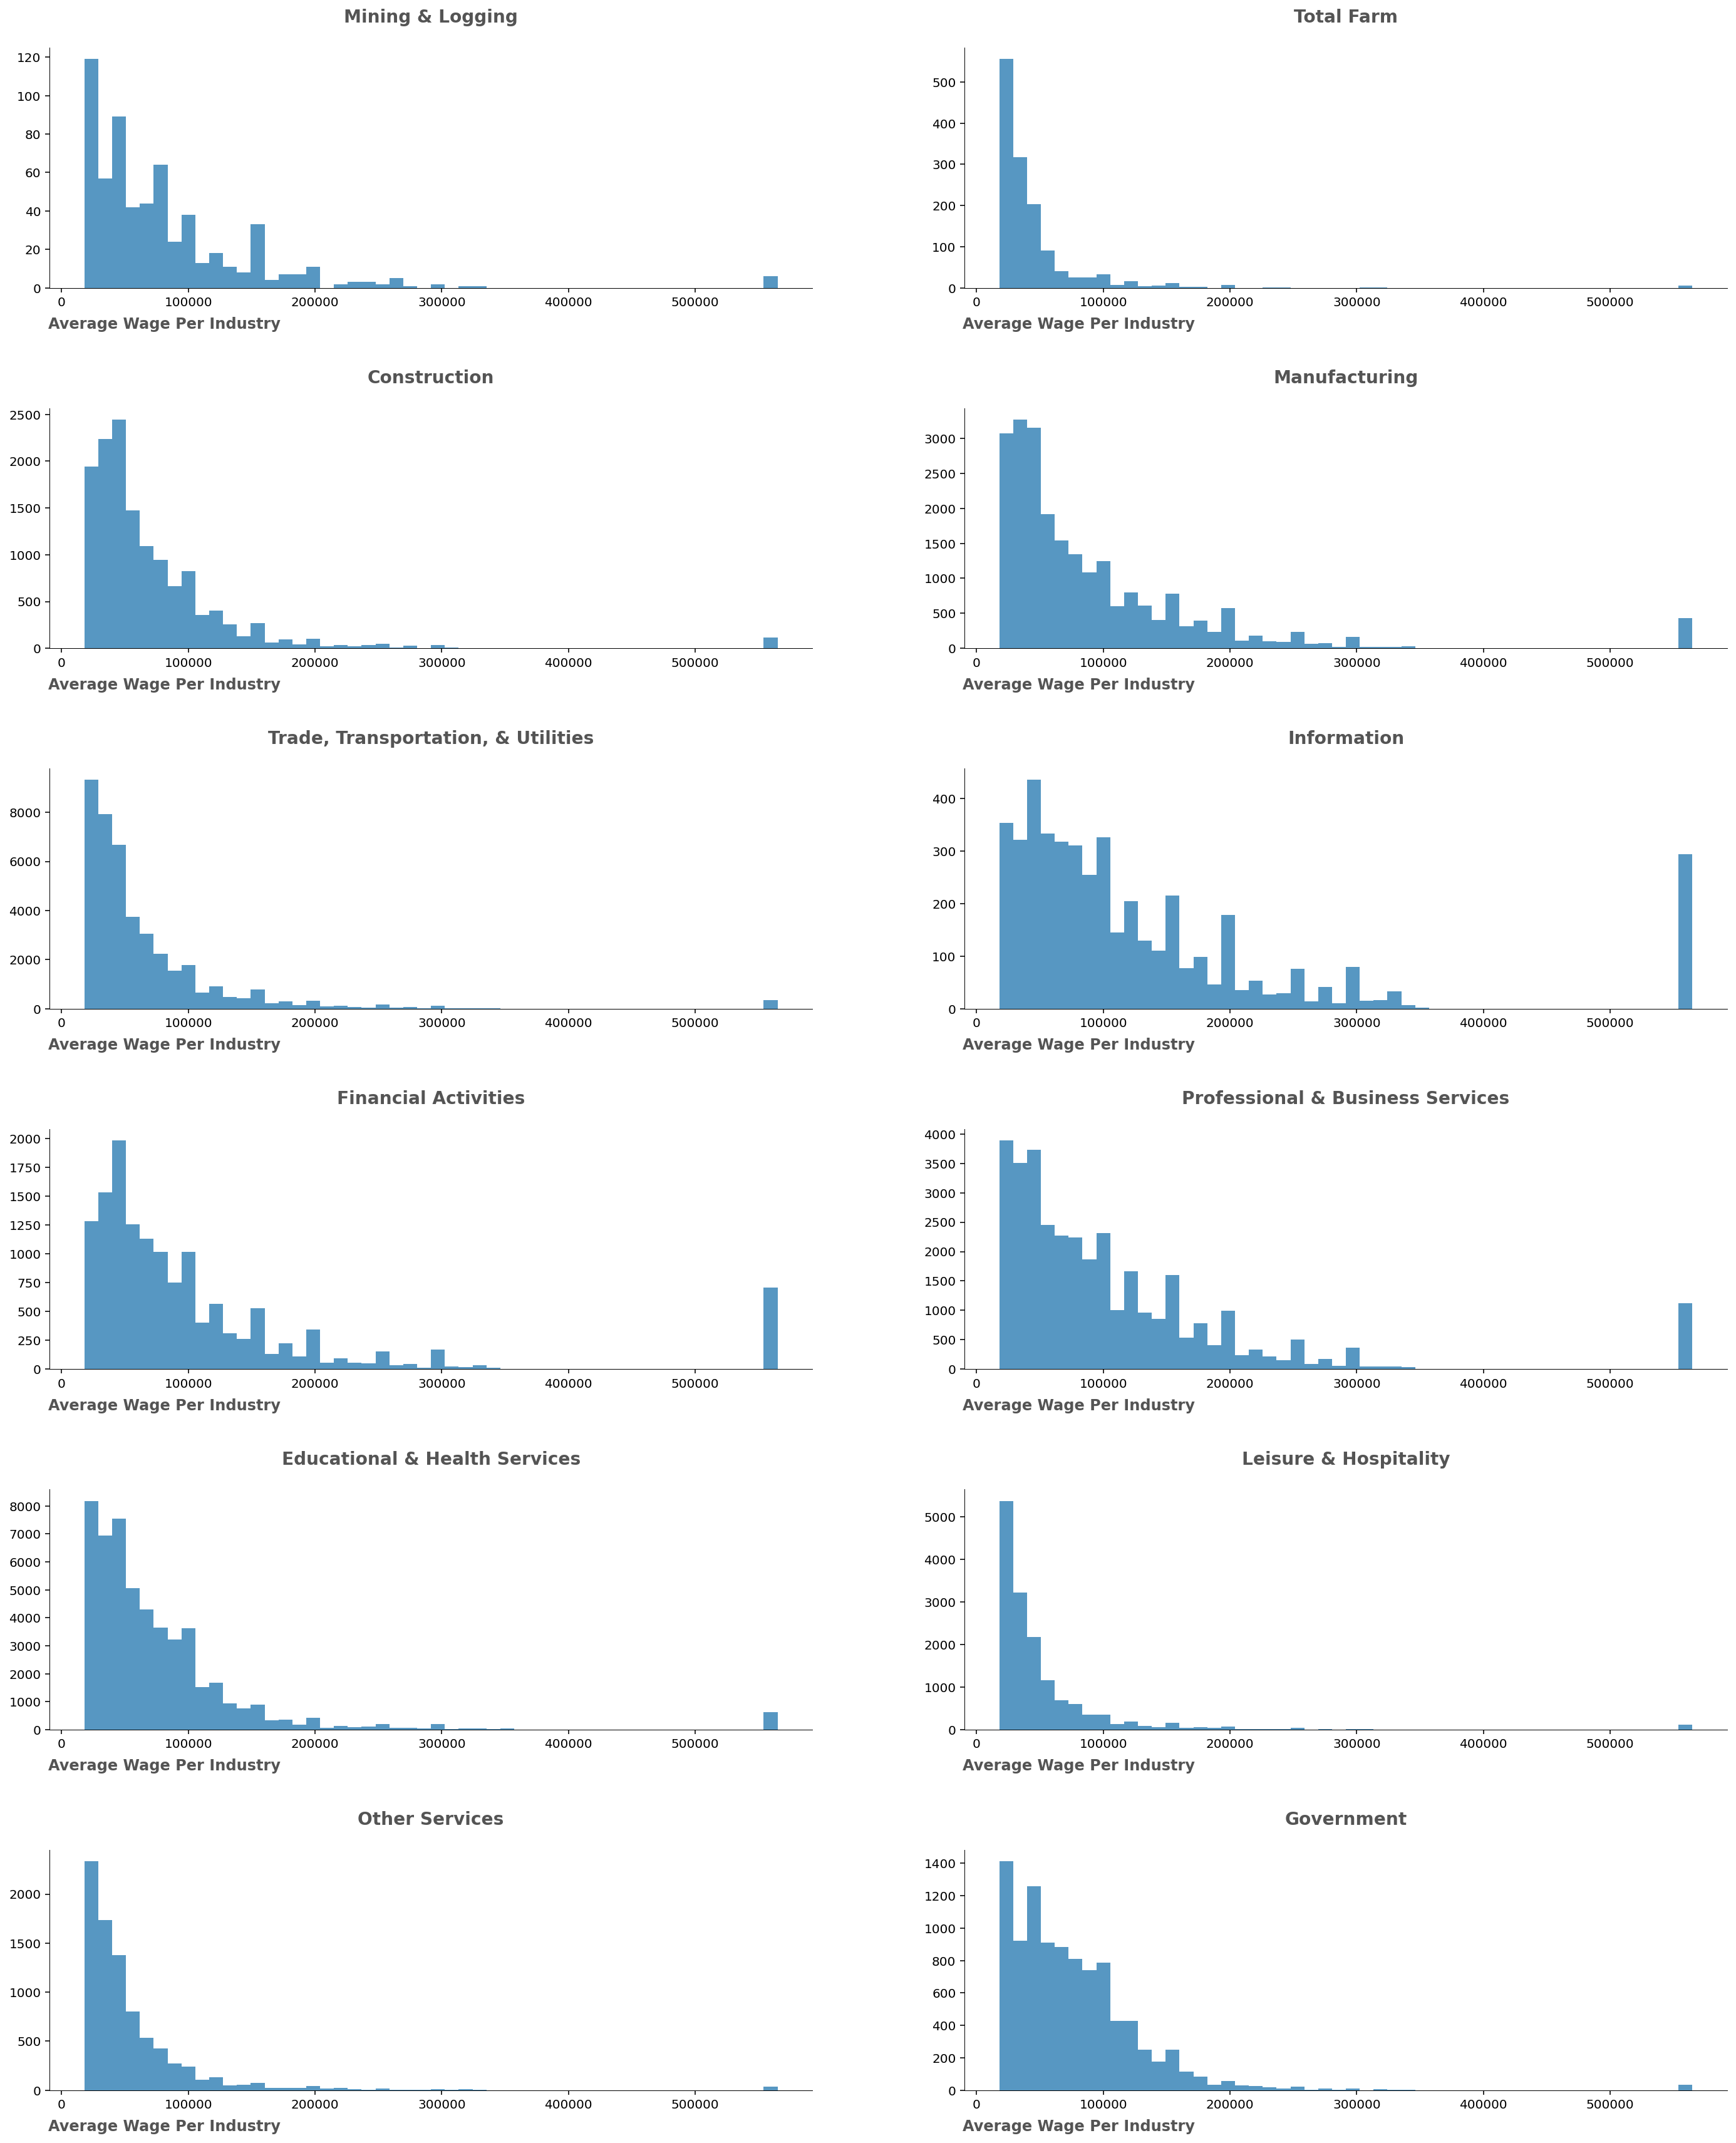

In [31]:
plot_hist(main_ind_dfs, main_ind_titles)

In [134]:
ca_ipums_wages_regions = ca_ipums_wages_regions.sort_values('INCWAGE')
ca_ipums_wages_regions

,YEAR,COUNTYFIP,PERWT,INCWAGE,Crosswalk Value,FIPS
Regions,,,,,,
Central Valley,2020.0,55.396480,151.406885,61028.505173,18.900523,6055.396480
Inland Empire,2020.0,67.699233,151.306071,61840.348170,19.352269,6067.699233
Redwood Coast,2020.0,23.000000,120.370052,63490.017212,20.791738,6023.000000
Shasta / Cascades,2020.0,47.327869,119.219461,64790.163934,20.630354,6047.327869
Los Angeles,2020.0,37.000000,125.805076,72805.294679,20.250648,6037.000000
Sacramento,2020.0,65.939186,133.287931,76489.053485,21.459613,6065.939186
San Diego-Imperial,2020.0,71.800528,144.135018,76549.196389,20.857827,6071.800528
Central Coast,2020.0,96.372448,133.502308,78717.714637,20.124628,6096.372448
Orange,2020.0,59.000000,134.173495,85670.901573,19.582774,6059.000000


In [135]:
total_weight = ca_ipums['PERWT'].sum()
total_weight

28990431.0

In [136]:
wages_summed = (ca_ipums['INCWAGE'] * ca_ipums['PERWT']).sum()
wages_summed

2221649535700.0

In [137]:
avg_wage = wages_summed / total_weight
avg_wage

76633.89122086526

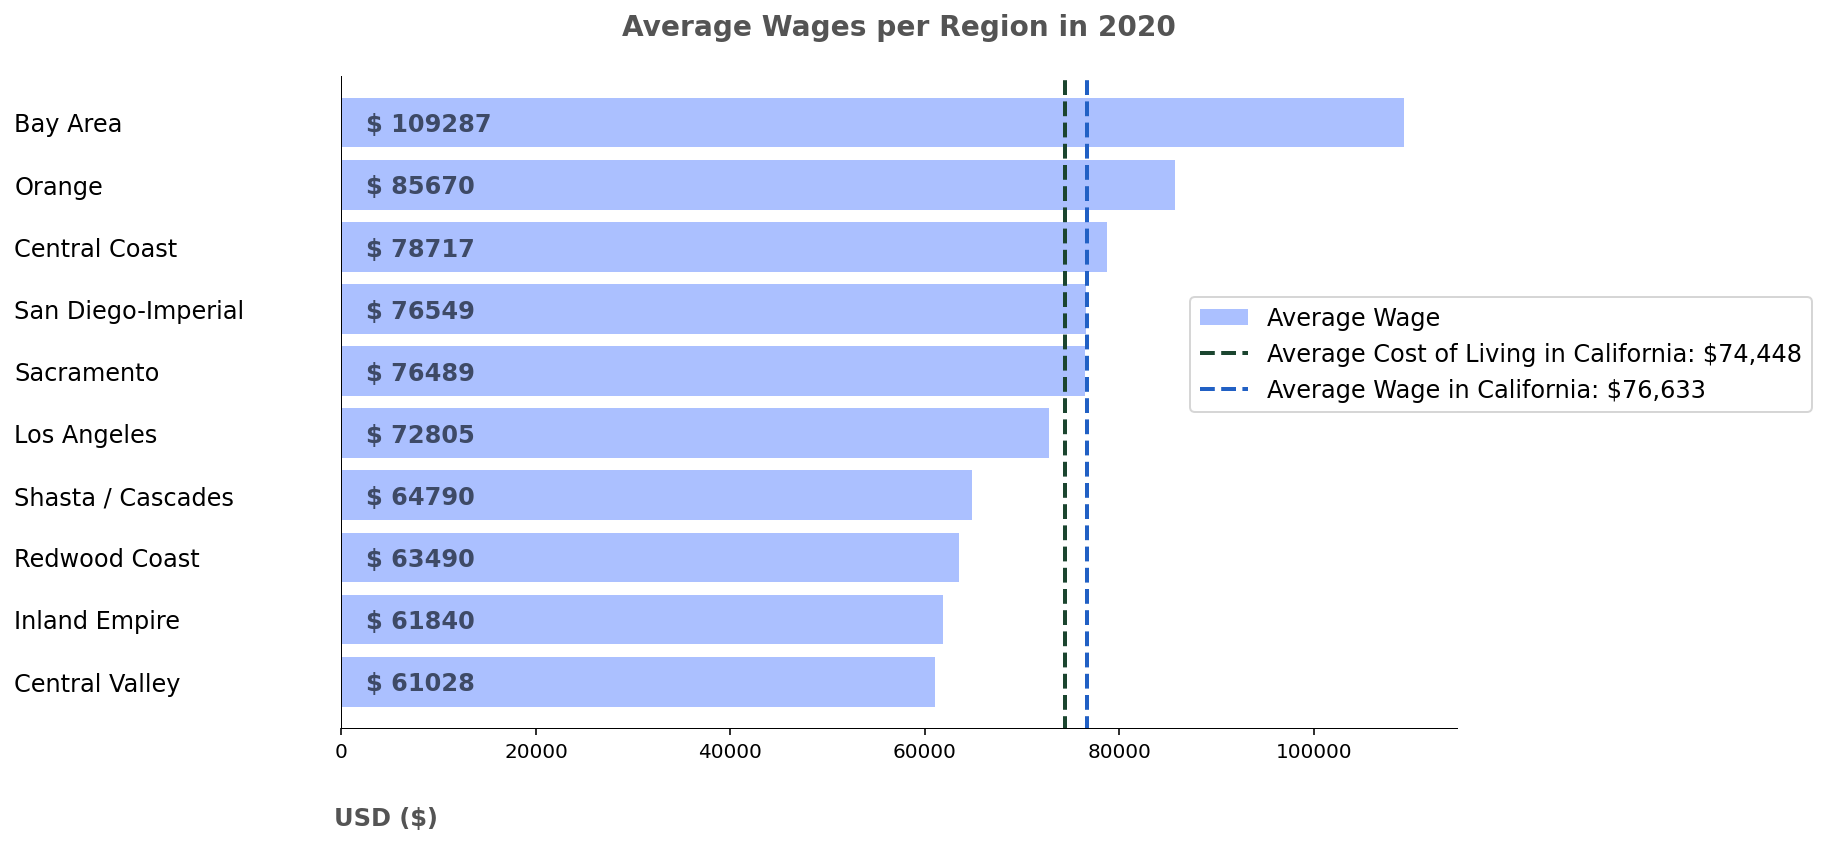

In [139]:
fig, ax = plt.subplots(figsize=(10,6))

ax.barh(np.arange(10), ca_ipums_wages_regions['INCWAGE'].values, color='#abc0ff', label="Average Wage")

ax.set_yticks(np.arange(10))
ax.set_yticklabels(ca_ipums_wages_regions.index, fontsize = 12, ha='left')
ax.tick_params(axis='y',direction='out', pad=160, left=False)

ax.set_xlabel("USD ($)", fontsize=12, weight='bold', color = '#545454')
ax.xaxis.set_label_coords(0.04, -0.12)

ca_col = cost_of_living['Cost of Living'][11:12].values

ax.vlines(x=avg_wage, ymin=-0.8, ymax=10, 
          color='#2160c4', lw=2, ls='dashed', label=f'Average Wage in California: $76,633')
ax.vlines(x=ca_col, ymin=-0.8, ymax=10, 
          color='#1b452f', lw=2, ls='dashed', label='Average Cost of Living in California: $74,448')
ax.set_ylim(-0.75, 9.75)

ax.set_title('Average Wages per Region in 2020', 
             fontsize=14, weight='bold', pad=20, color='#545454')

ax.annotate(f"$ {int(ca_ipums_wages_regions['INCWAGE'].values[0])}", (2500, -0.15), size=12, weight='bold', color='#3e4a66', annotation_clip=False)
ax.annotate(f"$ {int(ca_ipums_wages_regions['INCWAGE'].values[1])}", (2500, 0.85), size=12, weight='bold', color='#3e4a66', annotation_clip=False)
ax.annotate(f"$ {int(ca_ipums_wages_regions['INCWAGE'].values[2])}", (2500, 1.85), size=12, weight='bold', color='#3e4a66', annotation_clip=False)
ax.annotate(f"$ {int(ca_ipums_wages_regions['INCWAGE'].values[3])}", (2500, 2.85), size=12, weight='bold', color='#3e4a66', annotation_clip=False)
ax.annotate(f"$ {int(ca_ipums_wages_regions['INCWAGE'].values[4])}", (2500, 3.85), size=12, weight='bold', color='#3e4a66', annotation_clip=False)
ax.annotate(f"$ {int(ca_ipums_wages_regions['INCWAGE'].values[5])}", (2500, 4.85), size=12, weight='bold', color='#3e4a66', annotation_clip=False)
ax.annotate(f"$ {int(ca_ipums_wages_regions['INCWAGE'].values[6])}", (2500, 5.85), size=12, weight='bold', color='#3e4a66', annotation_clip=False)
ax.annotate(f"$ {int(ca_ipums_wages_regions['INCWAGE'].values[7])}", (2500, 6.85), size=12, weight='bold', color='#3e4a66', annotation_clip=False)
ax.annotate(f"$ {int(ca_ipums_wages_regions['INCWAGE'].values[8])}", (2500, 7.85), size=12, weight='bold', color='#3e4a66', annotation_clip=False)
ax.annotate(f"$ {int(ca_ipums_wages_regions['INCWAGE'].values[9])}", (2500, 8.85), size=12, weight='bold', color='#3e4a66', annotation_clip=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(0.75, 0.68), loc='upper left', fontsize=12)
plt.show()

In [157]:
col_regions = cost_of_living[0:10].groupby('Regions').mean().sort_values('Cost of Living')
col_regions

,Cost of Living
Regions,
San Diego-Imperial,51652
Shasta / Cascades,56468
Central Valley,56747
Redwood Coast,58625
Inland Empire,63170
Sacramento,64520
Central Coast,76493
Los Angeles,80216
Orange,87648


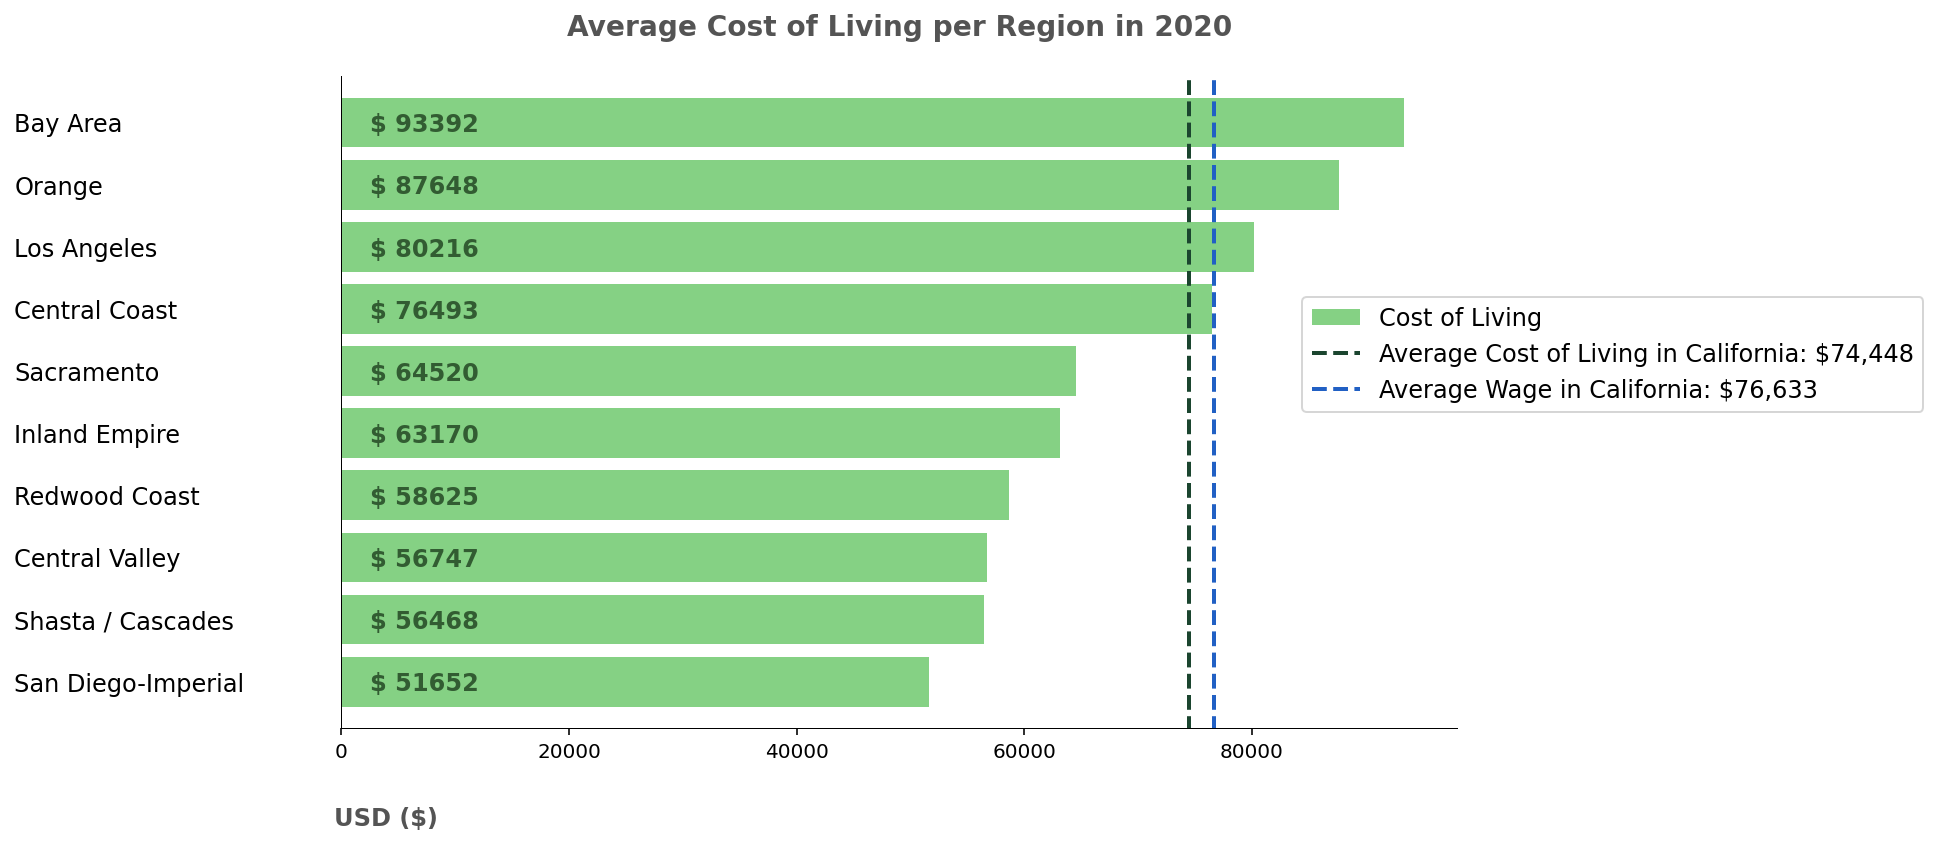

In [159]:
fig, ax = plt.subplots(figsize=(10,6))

ax.barh(np.arange(10), col_regions['Cost of Living'].values, color='#85d184', label="Cost of Living")

ax.set_yticks(np.arange(10))
ax.set_yticklabels(col_regions.index, fontsize = 12, ha='left')
ax.tick_params(axis='y',direction='out', pad=160, left=False)

ax.set_xlabel("USD ($)", fontsize=12, weight='bold', color = '#545454')
ax.xaxis.set_label_coords(0.04, -0.12)

ca_col = cost_of_living['Cost of Living'][11:12].values

ax.vlines(x=avg_wage, ymin=-0.8, ymax=10, 
          color='#2160c4', lw=2, ls='dashed', label=f'Average Wage in California: $76,633')
ax.vlines(x=ca_col, ymin=-0.8, ymax=10, 
          color='#1b452f', lw=2, ls='dashed', label='Average Cost of Living in California: $74,448')
ax.set_ylim(-0.75, 9.75)

ax.set_title('Average Cost of Living per Region in 2020', 
             fontsize=14, weight='bold', pad=20, color='#545454')

ax.annotate(f"$ {int(col_regions['Cost of Living'].values[0])}", (2500, -0.15), size=12, weight='bold', color='#325c32', annotation_clip=False)
ax.annotate(f"$ {int(col_regions['Cost of Living'].values[1])}", (2500, 0.85), size=12, weight='bold', color='#325c32', annotation_clip=False)
ax.annotate(f"$ {int(col_regions['Cost of Living'].values[2])}", (2500, 1.85), size=12, weight='bold', color='#325c32', annotation_clip=False)
ax.annotate(f"$ {int(col_regions['Cost of Living'].values[3])}", (2500, 2.85), size=12, weight='bold', color='#325c32', annotation_clip=False)
ax.annotate(f"$ {int(col_regions['Cost of Living'].values[4])}", (2500, 3.85), size=12, weight='bold', color='#325c32', annotation_clip=False)
ax.annotate(f"$ {int(col_regions['Cost of Living'].values[5])}", (2500, 4.85), size=12, weight='bold', color='#325c32', annotation_clip=False)
ax.annotate(f"$ {int(col_regions['Cost of Living'].values[6])}", (2500, 5.85), size=12, weight='bold', color='#325c32', annotation_clip=False)
ax.annotate(f"$ {int(col_regions['Cost of Living'].values[7])}", (2500, 6.85), size=12, weight='bold', color='#325c32', annotation_clip=False)
ax.annotate(f"$ {int(col_regions['Cost of Living'].values[8])}", (2500, 7.85), size=12, weight='bold', color='#325c32', annotation_clip=False)
ax.annotate(f"$ {int(col_regions['Cost of Living'].values[9])}", (2500, 8.85), size=12, weight='bold', color='#325c32', annotation_clip=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(0.85, 0.68), loc='upper left', fontsize=12)
plt.show()

### High wage count in CA over 2020

In [161]:
hw_state = data.groupby(by=["Date"]).sum()
hw_state['Percentage'] = (hw_state['High Wage Count'] / hw_state['Employment Count']) * 100
hw_state

,High Wage Count,Employment Count,Cost of Living,Percentage
Date,,,,
2020-01-01,5958279,18054800.0,13885718,33.001080
2020-02-01,6006147,18179700.0,13885718,33.037657
2020-03-01,5965325,17998700.0,13885718,33.143088
2020-04-01,5337848,15456900.0,13885718,34.533755
2020-05-01,5409851,15775000.0,13885718,34.293826
2020-06-01,5516625,16276900.0,13885718,33.892357
2020-07-01,5478709,16173400.0,13885718,33.874813
2020-08-01,5533304,16304000.0,13885718,33.938322
2020-09-01,5564311,16439000.0,13885718,33.848233


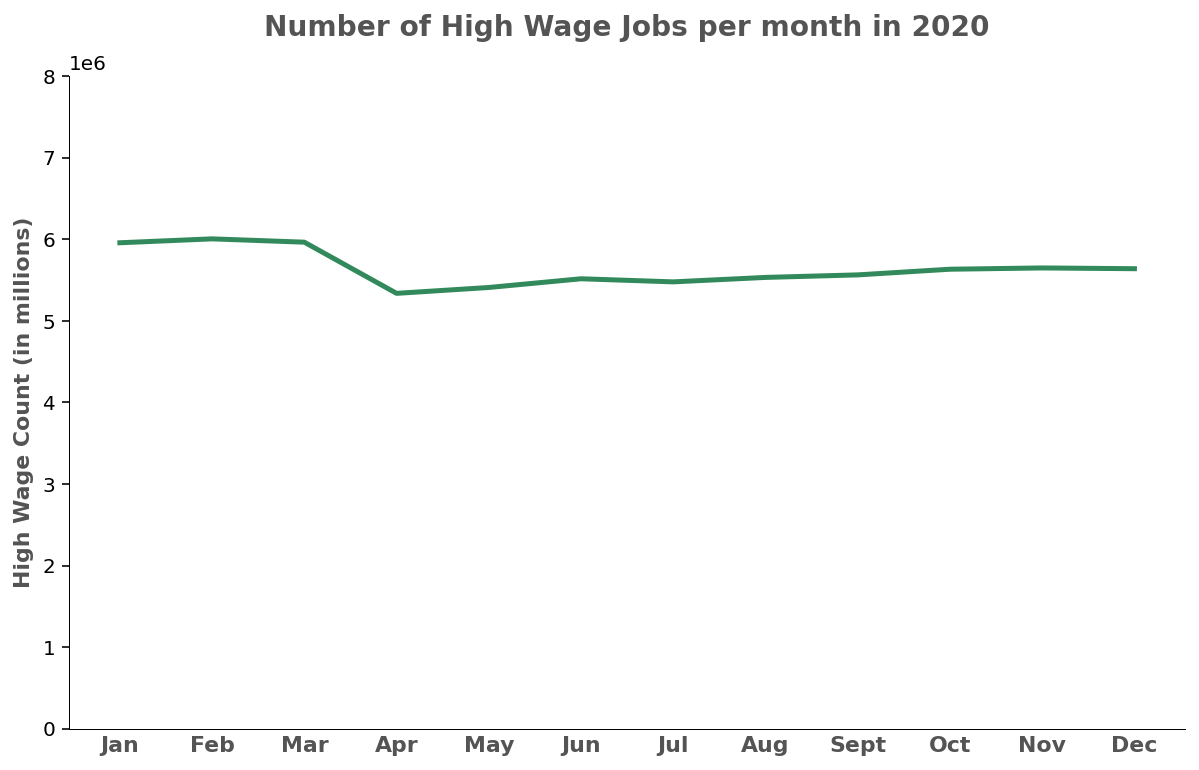

In [167]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(hw_state['High Wage Count'].values, lw=2.5, color='#328a5c')

ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], 
                   fontsize=11, weight='bold', color = '#545454')
ax.set_title('Number of High Wage Jobs per month in 2020', fontsize=14, weight='bold', pad=20, color='#545454')

plt.xticks(np.arange(0, 12, 1.0))
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylabel('High Wage Count (in millions)', fontsize=11, weight='bold', color='#545454')

ax.set_ylim(0,8e+6)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

plt.show()

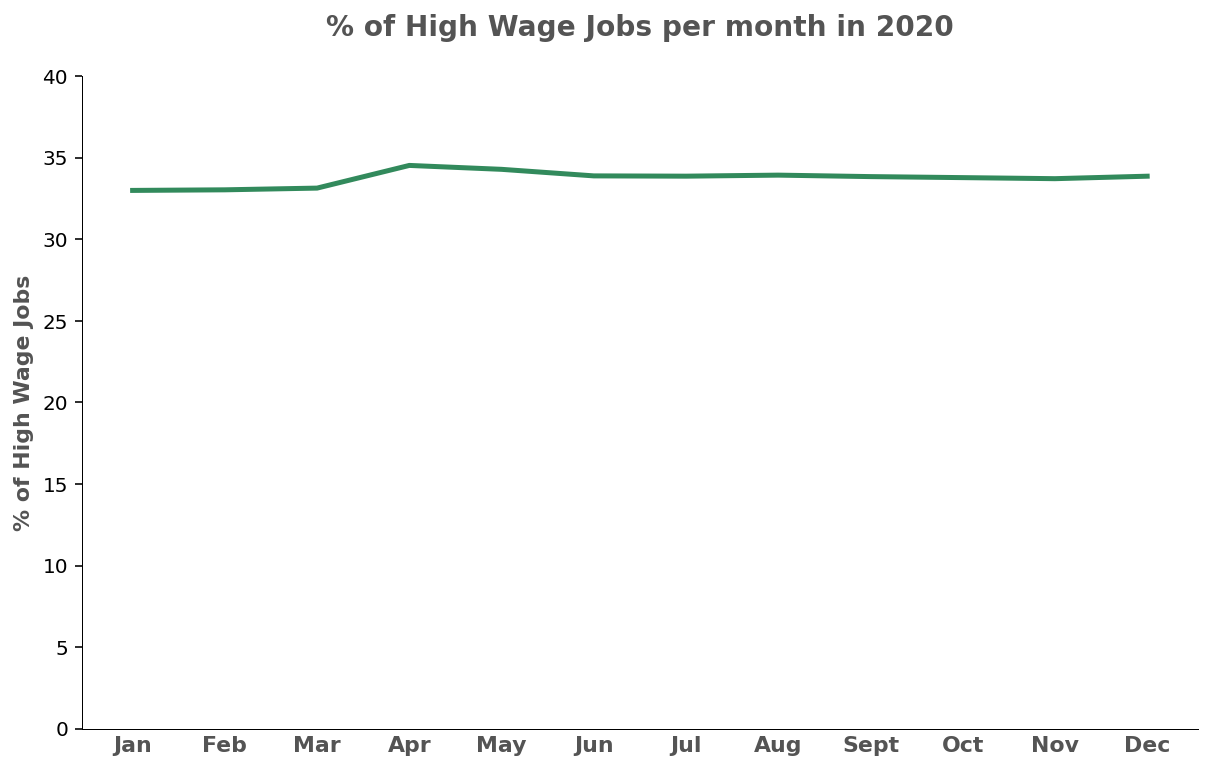

In [169]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(hw_state['Percentage'].values, lw=2.5, color='#328a5c')

ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], 
                   fontsize=11, weight='bold', color = '#545454')
ax.set_title('% of High Wage Jobs per month in 2020', fontsize=14, weight='bold', pad=20, color='#545454')

plt.xticks(np.arange(0, 12, 1.0))
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylabel('% of High Wage Jobs', fontsize=11, weight='bold', color='#545454')

ax.set_ylim(0, 40)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

plt.show()

### Industries with most and least high wage jobs in the state

In [49]:
hw_state_industry = data.groupby(by=["Industry"]).mean().sort_values(by='High Wage Count')
hw_state_industry_cut = hw_state_industry.iloc[[0, 1, 2, 3, 4, -5, -4, -3, -2, -1]]
hw_state_industry_cut

,High Wage Count,Employment Count,Cost of Living
Industry,,,
warehousing and storage,104.166667,2158.333333,51652.000000
mining and logging,381.316667,1568.333333,69558.900000
personal and laundry services,2499.833333,39550.000000,80216.000000
repair and maintenance,2790.166667,33483.333333,80216.000000
total farm,4337.939394,30900.757576,68368.818182
natural resources mining and construction,53109.983333,79011.666667,72663.200000
local government,60694.787879,156893.939394,68368.818182
educational and health services,74538.895833,189655.208333,65127.875000
health care and social assistance,102674.611111,374058.333333,77011.333333


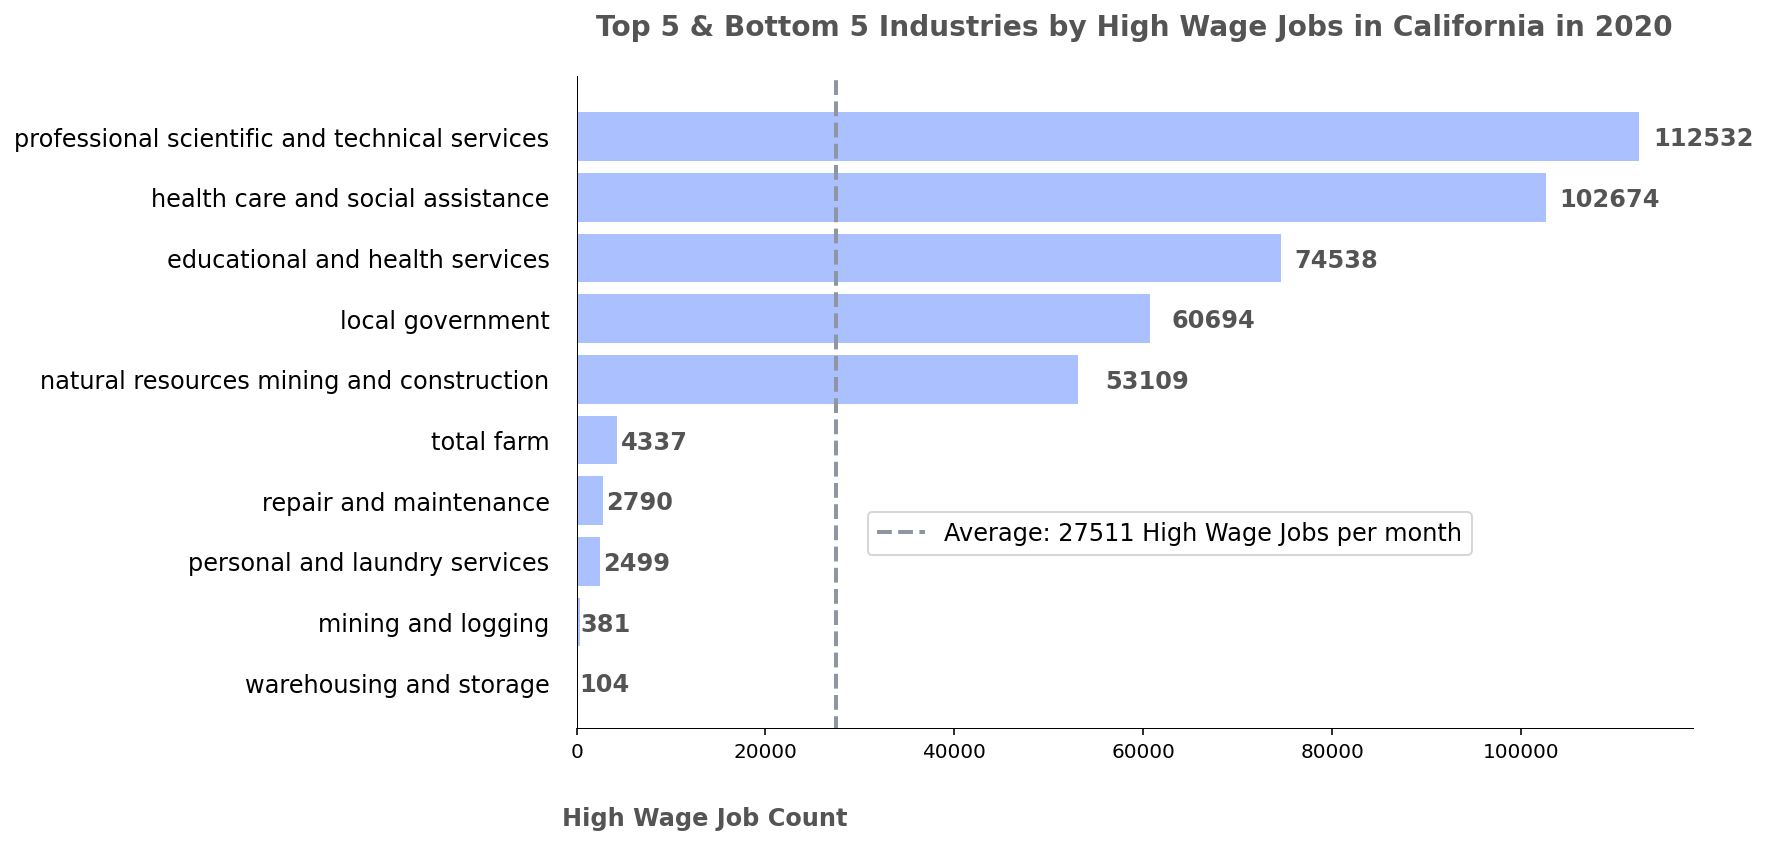

In [176]:
fig, ax = plt.subplots(figsize=(10,6))

ax.barh(np.arange(10), hw_state_industry_cut['High Wage Count'].values, color='#abc0ff')

ax.set_yticks(np.arange(10))
ax.set_yticklabels(hw_state_industry_cut.index, fontsize = 12, ha='right')
ax.tick_params(axis='y',direction='out', pad=10, left=False)

ax.set_xlabel("High Wage Job Count", fontsize=12, weight='bold', color = '#545454')
ax.xaxis.set_label_coords(0.115, -0.12)

mean_val = int(hw_state_industry['High Wage Count'].values.mean())

ax.vlines(x=mean_val, ymin=-0.8, ymax=10, 
          color='#8e95a3', lw=2, ls='dashed', label=f'Average: {mean_val} High Wage Jobs per month')
ax.set_ylim(-0.75, 10)

ax.set_title('Top 5 & Bottom 5 Industries by High Wage Jobs in California in 2020', 
             fontsize=14, weight='bold', pad=20, color='#545454')

ax.annotate(f"{int(hw_state_industry_cut['High Wage Count'].values[0])}", (300, -0.15), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_state_industry_cut['High Wage Count'].values[1])}", (400, 0.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_state_industry_cut['High Wage Count'].values[2])}", (2800, 1.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_state_industry_cut['High Wage Count'].values[3])}", (3100, 2.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_state_industry_cut['High Wage Count'].values[4])}", (4700, 3.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_state_industry_cut['High Wage Count'].values[5])}", (56000, 4.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_state_industry_cut['High Wage Count'].values[6])}", (63000, 5.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_state_industry_cut['High Wage Count'].values[7])}", (76000, 6.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_state_industry_cut['High Wage Count'].values[8])}", (104000, 7.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_state_industry_cut['High Wage Count'].values[9])}", (114000, 8.85), size=12, weight='bold', color='#545454', annotation_clip=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(0.25, 0.35), loc='upper left', fontsize=12)
plt.show()

### Average high wage count in 2020 per region

In [180]:
hw_regions = data.groupby(by=["Region", "Date"]).sum().groupby(by=['Region']).mean().sort_values(by='High Wage Count')
hw_regions['Percentage'] = (hw_regions['High Wage Count'] / hw_regions['Employment Count']) * 100
hw_regions

,High Wage Count,Employment Count,Cost of Living,Percentage
Region,,,,
Redwood Coast,1.914250e+04,4.761667e+04,879375.0,40.201260
Shasta / Cascades,4.842842e+04,1.426250e+05,847020.0,33.955069
Central Coast,2.437280e+05,7.246750e+05,1300381.0,33.632732
Inland Empire,4.073749e+05,1.492417e+06,1263400.0,27.296326
Orange,4.376303e+05,1.526550e+06,2015904.0,28.667933
Central Valley,5.386128e+05,1.532283e+06,1021446.0,35.150995
San Diego-Imperial,7.164734e+05,1.450100e+06,1084692.0,49.408552
Sacramento,7.985970e+05,1.955917e+06,1787044.0,40.829807
Los Angeles,1.073514e+06,4.298183e+06,2005400.0,24.976005


In [181]:
hw_regions_perc_sorted = hw_regions.sort_values(by='Percentage')
hw_regions_perc_sorted

,High Wage Count,Employment Count,Cost of Living,Percentage
Region,,,,
Los Angeles,1.073514e+06,4.298183e+06,2005400.0,24.976005
Inland Empire,4.073749e+05,1.492417e+06,1263400.0,27.296326
Orange,4.376303e+05,1.526550e+06,2015904.0,28.667933
Central Coast,2.437280e+05,7.246750e+05,1300381.0,33.632732
Shasta / Cascades,4.842842e+04,1.426250e+05,847020.0,33.955069
Central Valley,5.386128e+05,1.532283e+06,1021446.0,35.150995
Bay Area,1.357647e+06,3.557792e+06,1681056.0,38.159825
Redwood Coast,1.914250e+04,4.761667e+04,879375.0,40.201260
Sacramento,7.985970e+05,1.955917e+06,1787044.0,40.829807


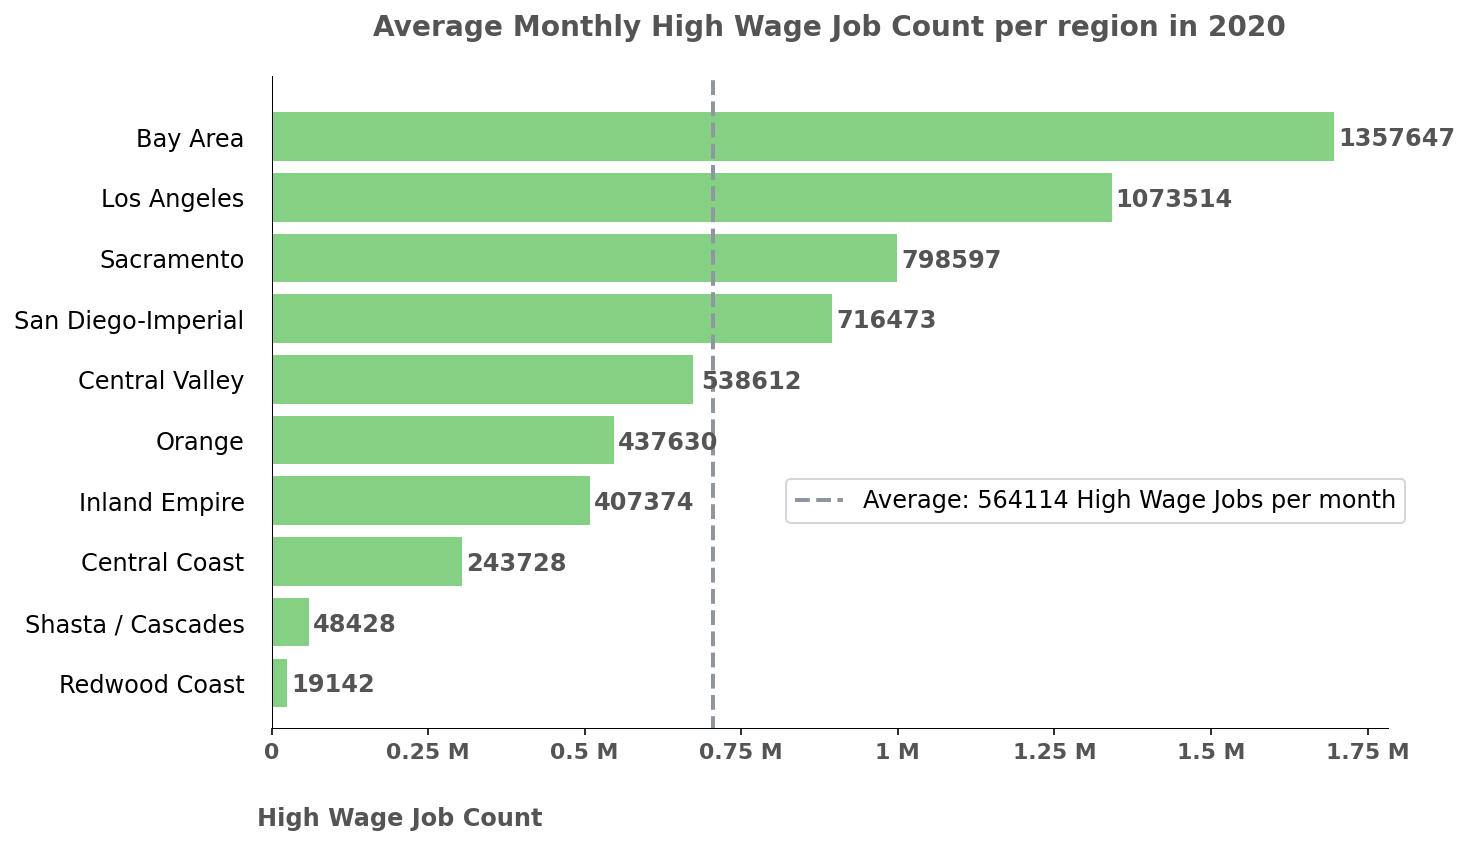

In [189]:
fig, ax = plt.subplots(figsize=(10,6))

ax.barh(np.arange(10), hw_regions['High Wage Count'].values, color='#85d184')

ax.set_yticks(np.arange(10))
ax.set_yticklabels(hw_regions.index, fontsize = 12, ha='right')
ax.tick_params(axis='y',direction='out', pad=10, left=False)

ax.set_xlabel("High Wage Job Count", fontsize=12, weight='bold', color = '#545454')
ax.set_xticklabels(['0', '0.25 M','0.5 M','0.75 M','1 M','1.25 M','1.5 M','1.75 M'], 
                   fontsize=11, weight='bold', color = '#545454')
ax.xaxis.set_label_coords(0.115, -0.12)

mean_val = int(hw_regions['High Wage Count'].values.mean())

ax.vlines(x=mean_val, ymin=-0.8, ymax=10, 
          color='#8e95a3', lw=2, ls='dashed', label=f'Average: {mean_val} High Wage Jobs per month')
ax.set_ylim(-0.75, 10)

ax.set_title('Average Monthly High Wage Job Count per region in 2020', 
             fontsize=14, weight='bold', pad=20, color='#545454')

ax.annotate(f"{int(hw_regions['High Wage Count'].values[0])}", (25000, -0.15), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_regions['High Wage Count'].values[1])}", (53000, 0.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_regions['High Wage Count'].values[2])}", (249000, 1.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_regions['High Wage Count'].values[3])}", (412000, 2.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_regions['High Wage Count'].values[4])}", (443000, 3.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_regions['High Wage Count'].values[5])}", (549000, 4.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_regions['High Wage Count'].values[6])}", (721000, 5.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_regions['High Wage Count'].values[7])}", (804000, 6.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_regions['High Wage Count'].values[8])}", (1078000, 7.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_regions['High Wage Count'].values[9])}", (1363000, 8.85), size=12, weight='bold', color='#545454', annotation_clip=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(0.45, 0.4), loc='upper left', fontsize=12)
plt.show()

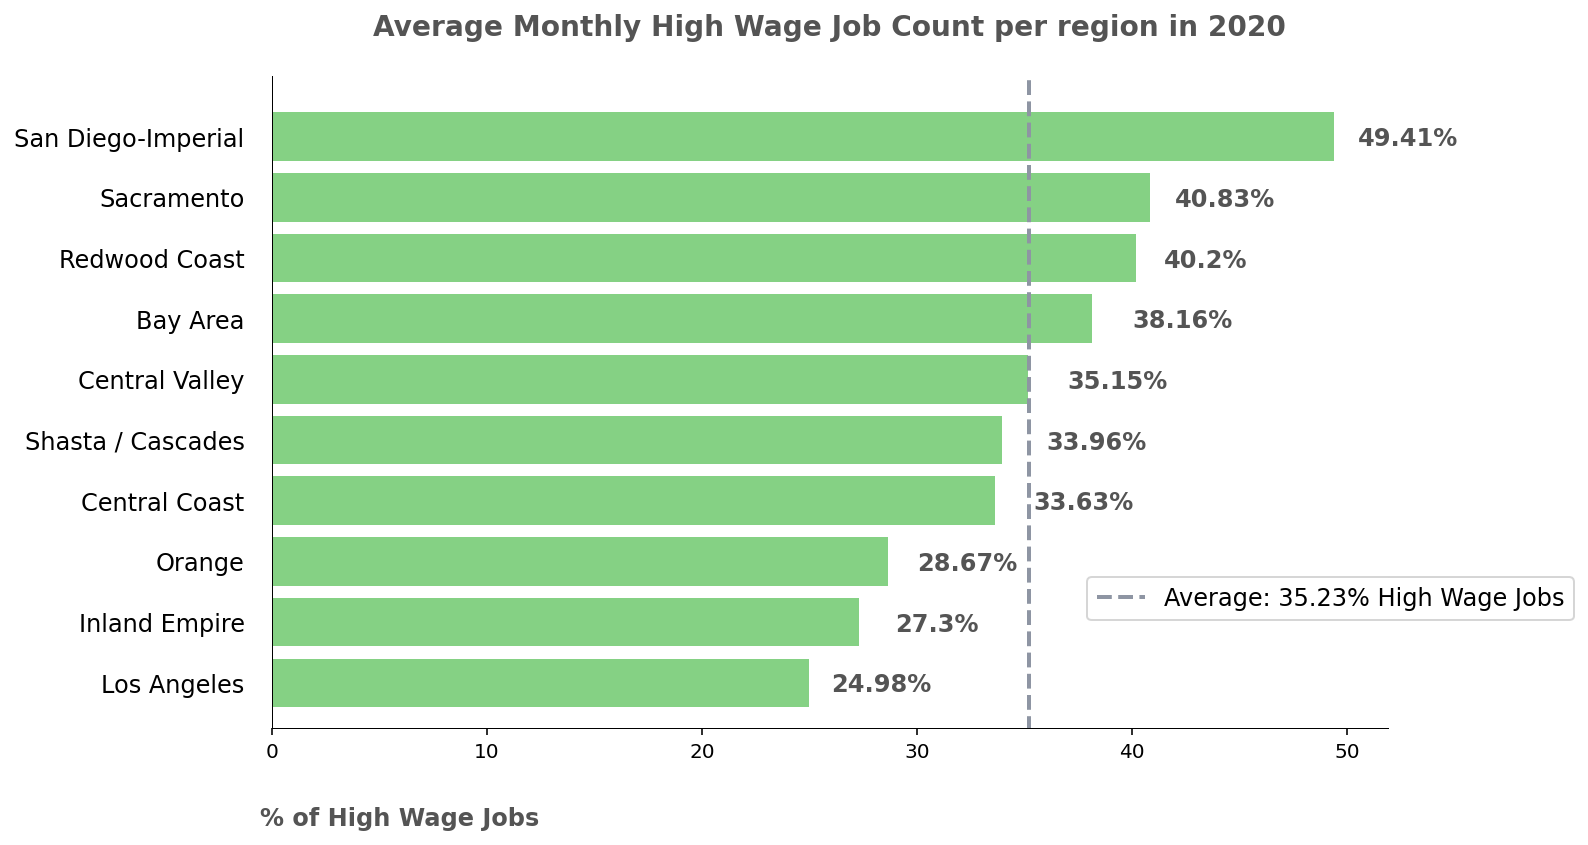

In [206]:
fig, ax = plt.subplots(figsize=(10,6))

ax.barh(np.arange(10), hw_regions_perc_sorted['Percentage'].values, color='#85d184')

ax.set_yticks(np.arange(10))
ax.set_yticklabels(hw_regions_perc_sorted.index, fontsize = 12, ha='right')
ax.tick_params(axis='y',direction='out', pad=10, left=False)

ax.set_xlabel("% of High Wage Jobs", fontsize=12, weight='bold', color = '#545454')
ax.xaxis.set_label_coords(0.115, -0.12)

mean_val = round(hw_regions_perc_sorted['Percentage'].values.mean(), 2)

ax.vlines(x=mean_val, ymin=-0.8, ymax=10, 
          color='#8e95a3', lw=2, ls='dashed', label=f'Average: {mean_val}% High Wage Jobs')
ax.set_ylim(-0.75, 10)

ax.set_title('Average Monthly High Wage Job Count per region in 2020', 
             fontsize=14, weight='bold', pad=20, color='#545454')

ax.annotate(f"{round(hw_regions_perc_sorted['Percentage'].values[0], 2)}%", (26, -0.15), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{round(hw_regions_perc_sorted['Percentage'].values[1], 2)}%", (29, 0.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{round(hw_regions_perc_sorted['Percentage'].values[2], 2)}%", (30, 1.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{round(hw_regions_perc_sorted['Percentage'].values[3], 2)}%", (35.4, 2.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{round(hw_regions_perc_sorted['Percentage'].values[4], 2)}%", (36, 3.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{round(hw_regions_perc_sorted['Percentage'].values[5], 2)}%", (37, 4.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{round(hw_regions_perc_sorted['Percentage'].values[6], 2)}%", (40, 5.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{round(hw_regions_perc_sorted['Percentage'].values[7], 2)}%", (41.5, 6.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{round(hw_regions_perc_sorted['Percentage'].values[8], 2)}%", (42, 7.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{round(hw_regions_perc_sorted['Percentage'].values[9], 2)}%", (50.5, 8.85), size=12, weight='bold', color='#545454', annotation_clip=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(0.72, 0.25), loc='upper left', fontsize=12)
plt.show()

In [56]:
shasta_data = data.loc[data['Region'] == 'Shasta / Cascades']
cv_data = data.loc[data['Region'] == 'Central Valley']
rc_data = data.loc[data['Region'] == 'Redwood Coast']
sd_data = data.loc[data['Region'] == 'San Diego-Imperial']
orange_data = data.loc[data['Region'] == 'Orange']
ie_data = data.loc[data['Region'] == 'Inland Empire']
cc_data = data.loc[data['Region'] == 'Central Coast']
bay_data = data.loc[data['Region'] == 'Bay Area']
sac_data = data.loc[data['Region'] == 'Sacramento']
la_data = data.loc[data['Region'] == 'Los Angeles']

In [57]:
hw_shasta = shasta_data.groupby(by=["Date"]).sum()
hw_shasta['Percentage'] = (hw_shasta['High Wage Count'] / hw_shasta['Employment Count']) * 100
hw_cv = cv_data.groupby(by=["Date"]).sum()
hw_cv['Percentage'] = (hw_cv['High Wage Count'] / hw_cv['Employment Count']) * 100
hw_rc = rc_data.groupby(by=["Date"]).sum()
hw_rc['Percentage'] = (hw_rc['High Wage Count'] / hw_rc['Employment Count']) * 100
hw_sd = sd_data.groupby(by=["Date"]).sum()
hw_sd['Percentage'] = (hw_sd['High Wage Count'] / hw_sd['Employment Count']) * 100
hw_orange = orange_data.groupby(by=["Date"]).sum()
hw_orange['Percentage'] = (hw_orange['High Wage Count'] / hw_orange['Employment Count']) * 100
hw_ie = ie_data.groupby(by=["Date"]).sum()
hw_ie['Percentage'] = (hw_ie['High Wage Count'] / hw_ie['Employment Count']) * 100
hw_cc = cc_data.groupby(by=["Date"]).sum()
hw_cc['Percentage'] = (hw_cc['High Wage Count'] / hw_cc['Employment Count']) * 100
hw_bay = bay_data.groupby(by=["Date"]).sum()
hw_bay['Percentage'] = (hw_bay['High Wage Count'] / hw_bay['Employment Count']) * 100
hw_sac = sac_data.groupby(by=["Date"]).sum()
hw_sac['Percentage'] = (hw_sac['High Wage Count'] / hw_sac['Employment Count']) * 100
hw_la = la_data.groupby(by=["Date"]).sum()
hw_la['Percentage'] = (hw_la['High Wage Count'] / hw_la['Employment Count']) * 100

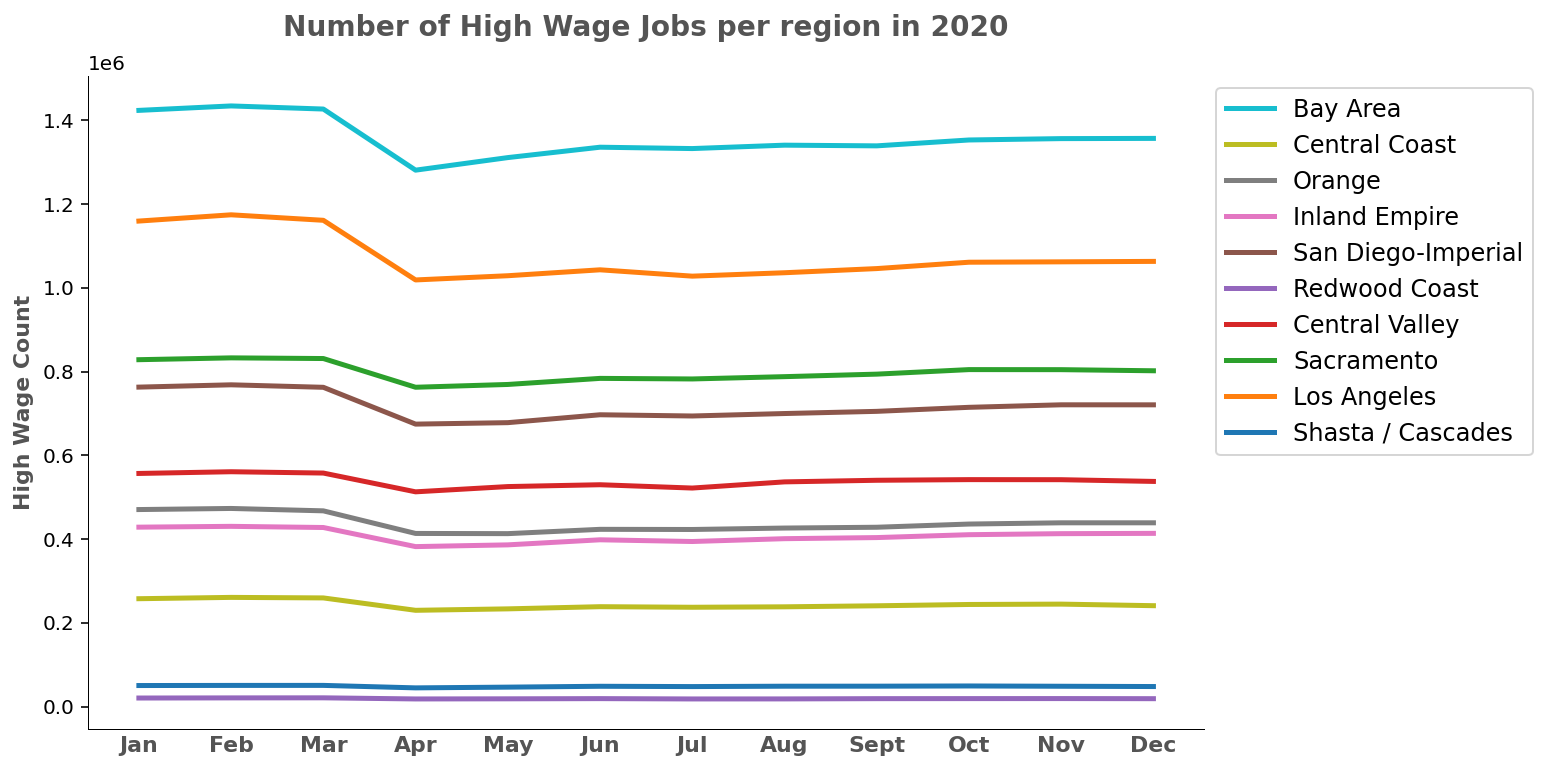

In [59]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(hw_shasta['High Wage Count'].values, lw=2.5, label='Shasta / Cascades')
ax.plot(hw_la['High Wage Count'].values, lw=2.5, label='Los Angeles')
ax.plot(hw_sac['High Wage Count'].values, lw=2.5, label='Sacramento')
ax.plot(hw_cv['High Wage Count'].values, lw=2.5, label='Central Valley')
ax.plot(hw_rc['High Wage Count'].values, lw=2.5, label='Redwood Coast')
ax.plot(hw_sd['High Wage Count'].values, lw=2.5, label='San Diego-Imperial')
ax.plot(hw_ie['High Wage Count'].values, lw=2.5, label='Inland Empire')
ax.plot(hw_orange['High Wage Count'].values, lw=2.5, label='Orange')
ax.plot(hw_cc['High Wage Count'].values, lw=2.5, label='Central Coast')
ax.plot(hw_bay['High Wage Count'].values, lw=2.5, label='Bay Area')

ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], 
                   fontsize=11, weight='bold', color = '#545454')
ax.set_title('Number of High Wage Jobs per region in 2020', fontsize=14, weight='bold', pad=20, color='#545454')

plt.xticks(np.arange(0, 12, 1.0))
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylabel('High Wage Count', fontsize=11, weight='bold', color='#545454')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)

plt.show()

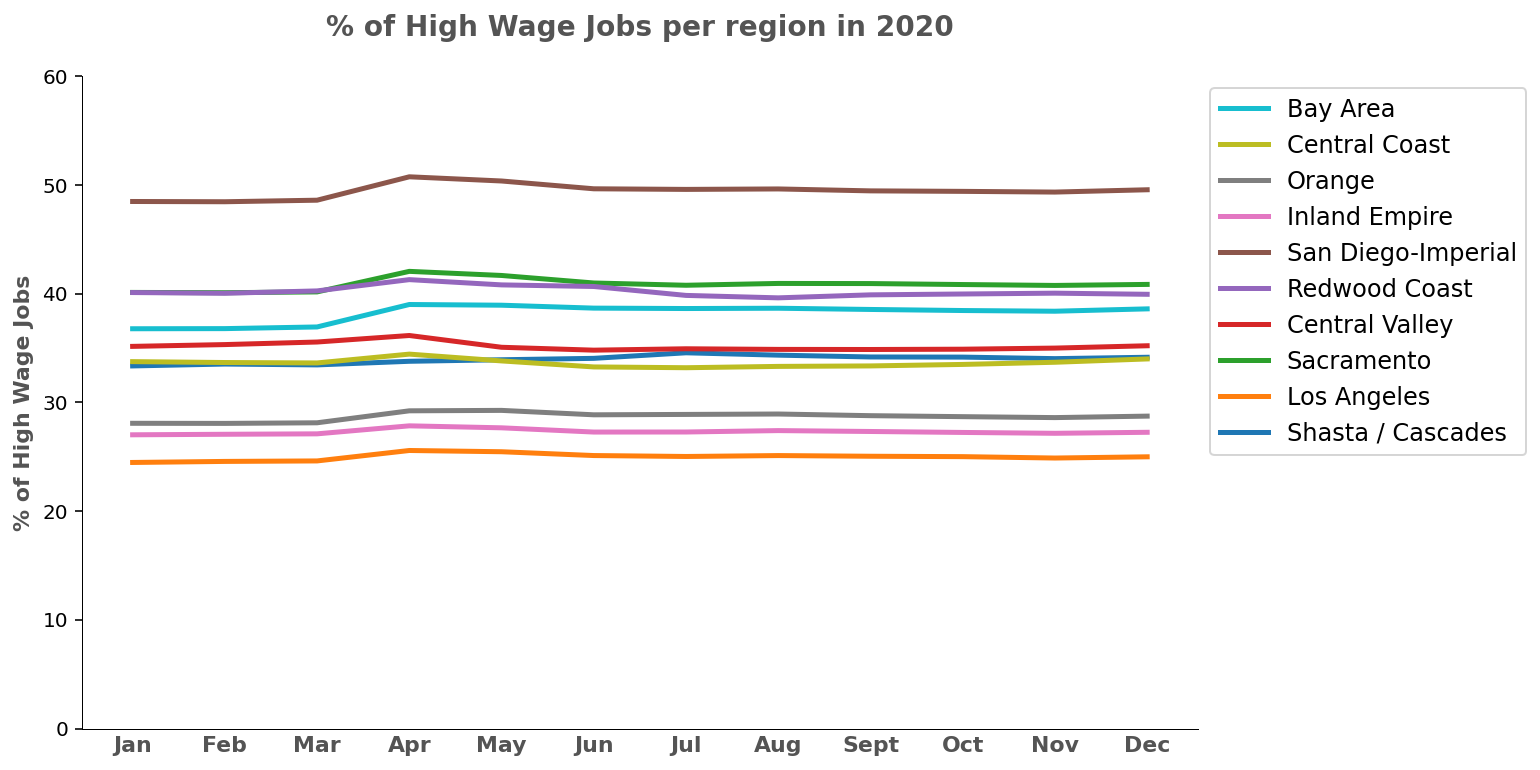

In [207]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(hw_shasta['Percentage'].values, lw=2.5, label='Shasta / Cascades')
ax.plot(hw_la['Percentage'].values, lw=2.5, label='Los Angeles')
ax.plot(hw_sac['Percentage'].values, lw=2.5, label='Sacramento')
ax.plot(hw_cv['Percentage'].values, lw=2.5, label='Central Valley')
ax.plot(hw_rc['Percentage'].values, lw=2.5, label='Redwood Coast')
ax.plot(hw_sd['Percentage'].values, lw=2.5, label='San Diego-Imperial')
ax.plot(hw_ie['Percentage'].values, lw=2.5, label='Inland Empire')
ax.plot(hw_orange['Percentage'].values, lw=2.5, label='Orange')
ax.plot(hw_cc['Percentage'].values, lw=2.5, label='Central Coast')
ax.plot(hw_bay['Percentage'].values, lw=2.5, label='Bay Area')

ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], 
                   fontsize=11, weight='bold', color = '#545454')
ax.set_title('% of High Wage Jobs per region in 2020', fontsize=14, weight='bold', pad=20, color='#545454')

plt.xticks(np.arange(0, 12, 1.0))
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylabel('% of High Wage Jobs', fontsize=11, weight='bold', color='#545454')

ax.set_ylim(0, 60)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)

plt.show()

### Average high wage count between rural and urban locations

# no longer have urban/rural since only at the regional level

In [208]:
# hw_rural_urban = data.groupby(by=["Rural/Urban", "Date"]).sum().groupby(by=['Rural/Urban']).mean().sort_values(by='High Wage Count')
# hw_rural_urban['Percentage'] = (hw_rural_urban['High Wage Count'] / hw_rural_urban['Employment Count']) * 100
# hw_rural_urban

In [209]:
# fig, ax = plt.subplots(figsize=(10,6))

# ax.barh(np.arange(2), hw_rural_urban['High Wage Count'].values, color='#c5ccdb')

# ax.set_yticks(np.arange(2))
# ax.set_yticklabels(hw_rural_urban.index, fontsize = 14, ha='left')
# ax.tick_params(axis='y',direction='out', pad=80, left=False)

# ax.set_xlabel("High Wage Job Count", fontsize=12, weight='bold', color = '#545454')
# ax.set_xticklabels(['0', '0.25 M','0.5 M','0.75 M','1 M','1.25 M','1.5 M','1.75 M','2 M'], 
#                    fontsize=11, weight='bold', color = '#545454')
# ax.xaxis.set_label_coords(0.115, -0.12)

# ax.annotate(f"{int(hw_rural_urban['High Wage Count'].values[1])} Monthly High Wage Jobs", (2000000, 1), size=12, weight='bold', color='#545454', annotation_clip=False)
# ax.annotate(f"{int(hw_rural_urban['High Wage Count'].values[0])} Monthly High Wage Jobs", (80000, 0), size=12, weight='bold', color='#545454', annotation_clip=False)
# weight='bold', 
# ax.set_title('Average Monthly High Wage Job Count in Rural/Urban Areas in 2019', 
#              fontsize=14, weight='bold', pad=20, color='#545454')

# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_linewidth(0.5)
# ax.spines['left'].set_linewidth(0.5)

# plt.show()

In [210]:
# fig, ax = plt.subplots(figsize=(10,6))

# ax.barh(np.arange(2), hw_rural_urban['Percentage'].values, color='#c5ccdb')

# ax.set_yticks(np.arange(2))
# ax.set_yticklabels(hw_rural_urban.index, fontsize = 14, ha='left')
# ax.tick_params(axis='y',direction='out', pad=80, left=False)

# ax.set_xlabel("% of High Wage Jobs", fontsize=12, weight='bold', color = '#545454')
# ax.xaxis.set_label_coords(0.115, -0.12)

# ax.annotate(f"{round(hw_rural_urban['Percentage'].values[1], 2)}% High Wage Jobs", (12.5, 1), size=12, weight='bold', color='#545454', annotation_clip=False)
# ax.annotate(f"{round(hw_rural_urban['Percentage'].values[0], 2)}% High Wage Jobs", (14, 0), size=12, weight='bold', color='#545454', annotation_clip=False)
# weight='bold', 
# ax.set_title('Average % of High Wage Jobs in Rural/Urban Areas in 2019', 
#              fontsize=14, weight='bold', pad=20, color='#545454')

# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_linewidth(0.5)
# ax.spines['left'].set_linewidth(0.5)

# plt.show()

### Tree Plot

In [63]:
hw_regions = hw_regions.sort_values('High Wage Count', ascending=False)
hw_regions

,High Wage Count,Employment Count,Cost of Living,Percentage
Region,,,,
Bay Area,1.357647e+06,3.557792e+06,1681056.0,38.159825
Los Angeles,1.073514e+06,4.298183e+06,2005400.0,24.976005
Sacramento,7.985970e+05,1.955917e+06,1787044.0,40.829807
San Diego-Imperial,7.164734e+05,1.450100e+06,1084692.0,49.408552
Central Valley,5.386128e+05,1.532283e+06,1021446.0,35.150995
Orange,4.376303e+05,1.526550e+06,2015904.0,28.667933
Inland Empire,4.073749e+05,1.492417e+06,1263400.0,27.296326
Central Coast,2.437280e+05,7.246750e+05,1300381.0,33.632732
Shasta / Cascades,4.842842e+04,1.426250e+05,847020.0,33.955069


In [65]:
data_dec2020 = data.loc[data['Date'] == '2020-12-01']
data_dec2020['Percentage'] = (data_dec2020['High Wage Count'] / data_dec2020['Employment Count']) * 100
data_dec2020.head()

,Industry,Date,Region,High Wage Count,Employment Count,Cost of Living,Percentage
11,accommodation and food services,2020-12-01,Inland Empire,13694,115300.0,63170,11.876843
23,administrative and support and waste services,2020-12-01,Inland Empire,25917,106500.0,63170,24.335211
35,arts entertainment and recreation,2020-12-01,Inland Empire,2305,11600.0,63170,19.870690
47,construction,2020-12-01,Inland Empire,38777,109500.0,63170,35.412785
59,durable goods,2020-12-01,Inland Empire,18549,56800.0,63170,32.656690


In [68]:
fig = px.treemap(data_dec2020, 
                 path=[px.Constant('California'), 'Region'], 
                 values='High Wage Count',
                )
fig.update_traces(root_color='lightgrey')
fig.show()

### Top 5 & Bottom 5 Counties by number of high wage jobs

# no longer at county level

In [82]:
# hw_county = data.groupby(by=["County", 'Date']).sum().groupby(by=['County']).mean().sort_values(by='High Wage Count')
# hw_county_cut = hw_county.iloc[[0, 1, 2, 3, 4, -5, -4, -3, -2, -1]]

In [83]:
# hw_county['Percentage'] = (hw_county['High Wage Count'] / hw_county['Employment Count']) * 100

In [211]:
# hw_county_cut

In [85]:
# hw_county_cut_perc_sorted = hw_county.sort_values(by='Percentage')
# hw_county_cut_perc_sorted = hw_county_cut_perc_sorted.iloc[[0, 1, 2, 3, 4, -5, -4, -3, -2, -1]]

In [212]:
# hw_county_cut_perc_sorted

In [214]:
# fig, ax = plt.subplots(figsize=(10,6))

# ax.barh(np.arange(10), hw_county_cut['High Wage Count'].values, color='#85d184')

# ax.set_yticks(np.arange(10))
# ax.set_yticklabels(hw_county_cut.index, fontsize = 12, ha='right')
# ax.tick_params(axis='y',direction='out', pad=10, left=False)

# ax.set_xlabel("High Wage Job Count", fontsize=12, weight='bold', color = '#545454')
# ax.xaxis.set_label_coords(0.115, -0.12)
# ax.set_xticklabels(['0', '0.25 M','0.5 M','0.75 M','1 M','1.25 M','1.5 M','1.75 M','2 M'], 
#                    fontsize=11, weight='bold', color = '#545454')

# ax.vlines(x=hw_county['High Wage Count'].values.mean(), ymin=-0.8, ymax=10, 
#           color='#8e95a3', lw=2, ls='dashed', label='Average: 5231 High Wage Jobs per month')
# ax.set_ylim(-0.75, 10)

# ax.set_title('Top 5 & Bottom 5 Counties by Number of High Wage Jobs in 2019', 
#              fontsize=14, weight='bold', pad=20, color='#545454')

# ax.annotate(f"{int(hw_county_cut['High Wage Count'].values[0])}", (10000, -0.15), size=12, weight='bold', color='#545454', annotation_clip=False)
# ax.annotate(f"{int(hw_county_cut['High Wage Count'].values[1])}", (10000, 0.85), size=12, weight='bold', color='#545454', annotation_clip=False)
# ax.annotate(f"{int(hw_county_cut['High Wage Count'].values[2])}", (10000, 1.85), size=12, weight='bold', color='#545454', annotation_clip=False)
# ax.annotate(f"{int(hw_county_cut['High Wage Count'].values[3])}", (10000, 2.85), size=12, weight='bold', color='#545454', annotation_clip=False)
# ax.annotate(f"{int(hw_county_cut['High Wage Count'].values[4])}", (10000, 3.85), size=12, weight='bold', color='#545454', annotation_clip=False)
# ax.annotate(f"{int(hw_county_cut['High Wage Count'].values[5])}", (70000, 4.85), size=12, weight='bold', color='#545454', annotation_clip=False)
# ax.annotate(f"{int(hw_county_cut['High Wage Count'].values[6])}", (70000, 5.85), size=12, weight='bold', color='#545454', annotation_clip=False)
# ax.annotate(f"{int(hw_county_cut['High Wage Count'].values[7])}", (200000, 6.85), size=12, weight='bold', color='#545454', annotation_clip=False)
# ax.annotate(f"{int(hw_county_cut['High Wage Count'].values[8])}", (510000, 7.85), size=12, weight='bold', color='#545454', annotation_clip=False)
# ax.annotate(f"{int(hw_county_cut['High Wage Count'].values[9])}", (1120000, 8.85), size=12, weight='bold', color='#545454', annotation_clip=False)

# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_linewidth(0.5)
# ax.spines['left'].set_linewidth(0.5)

# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(0.15, 0.35), loc='upper left', fontsize=12)
# plt.show()

In [215]:
# fig, ax = plt.subplots(figsize=(10,6))

# ax.barh(np.arange(10), hw_county_cut_perc_sorted['Percentage'].values, color='#85d184')

# ax.set_yticks(np.arange(10))
# ax.set_yticklabels(hw_county_cut_perc_sorted.index, fontsize = 12, ha='right')
# ax.tick_params(axis='y',direction='out', pad=10, left=False)

# ax.set_xlabel("% of High Wage Jobs", fontsize=12, weight='bold', color = '#545454')
# ax.xaxis.set_label_coords(0.115, -0.12)

# mean_val = round(hw_county['Percentage'].values.mean(), 2)

# ax.vlines(x=hw_county['Percentage'].values.mean(), ymin=-0.8, ymax=10, 
#           color='#8e95a3', lw=2, ls='dashed', label=f'Average: {mean_val}% High Wage Jobs per month')
# ax.set_ylim(-0.75, 10)

# ax.set_title('Top 5 & Bottom 5 Counties by % of High Wage Jobs in 2019', 
#              fontsize=14, weight='bold', pad=20, color='#545454')

# ax.annotate(f"{round(hw_county_cut_perc_sorted['Percentage'].values[0], 2)}%", (1, -0.15), size=12, weight='bold', color='#545454', annotation_clip=False)
# ax.annotate(f"{round(hw_county_cut_perc_sorted['Percentage'].values[1], 2)}%", (1, 0.85), size=12, weight='bold', color='#545454', annotation_clip=False)
# ax.annotate(f"{round(hw_county_cut_perc_sorted['Percentage'].values[2], 2)}%", (2, 1.85), size=12, weight='bold', color='#545454', annotation_clip=False)
# ax.annotate(f"{round(hw_county_cut_perc_sorted['Percentage'].values[3], 2)}%", (2.5, 2.85), size=12, weight='bold', color='#545454', annotation_clip=False)
# ax.annotate(f"{round(hw_county_cut_perc_sorted['Percentage'].values[4], 2)}%", (4.5, 3.85), size=12, weight='bold', color='#545454', annotation_clip=False)
# ax.annotate(f"{round(hw_county_cut_perc_sorted['Percentage'].values[5], 2)}%", (57.5, 4.85), size=12, weight='bold', color='#545454', annotation_clip=False)
# ax.annotate(f"{round(hw_county_cut_perc_sorted['Percentage'].values[6], 2)}%", (60, 5.85), size=12, weight='bold', color='#545454', annotation_clip=False)
# ax.annotate(f"{round(hw_county_cut_perc_sorted['Percentage'].values[7], 2)}%", (60.5, 6.85), size=12, weight='bold', color='#545454', annotation_clip=False)
# ax.annotate(f"{round(hw_county_cut_perc_sorted['Percentage'].values[8], 2)}%", (61.5, 7.85), size=12, weight='bold', color='#545454', annotation_clip=False)
# ax.annotate(f"{round(hw_county_cut_perc_sorted['Percentage'].values[9], 2)}%", (62.5, 8.85), size=12, weight='bold', color='#545454', annotation_clip=False)

# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_linewidth(0.5)
# ax.spines['left'].set_linewidth(0.5)

# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(0.37, 0.35), loc='upper left', fontsize=12)
# plt.show()

### Job Creation Numbers

In [69]:
data.head()

,Industry,Date,Region,High Wage Count,Employment Count,Cost of Living
0,accommodation and food services,2020-01-01,Inland Empire,18315,154200.0,63170
1,accommodation and food services,2020-02-01,Inland Empire,18623,156800.0,63170
2,accommodation and food services,2020-03-01,Inland Empire,18279,153900.0,63170
3,accommodation and food services,2020-04-01,Inland Empire,11354,95600.0,63170
4,accommodation and food services,2020-05-01,Inland Empire,12174,102500.0,63170


In [70]:
data_jobcreation = data.groupby(by=['Region', 'Date']).sum()[['High Wage Count']]
data_jobcreation['Job Creation'] = data_jobcreation['High Wage Count'].diff()
data_jobcreation = data_jobcreation.reset_index()
data_jobcreation = data_jobcreation.loc[data_jobcreation['Date'] != '2020-01-01']
data_jobcreation.head()

,Region,Date,High Wage Count,Job Creation
1,Bay Area,2020-02-01,1434413,10634.0
2,Bay Area,2020-03-01,1426973,-7440.0
3,Bay Area,2020-04-01,1281033,-145940.0
4,Bay Area,2020-05-01,1311035,30002.0
5,Bay Area,2020-06-01,1335837,24802.0


In [71]:
shasta_jc = data_jobcreation.loc[data_jobcreation['Region'] == 'Shasta / Cascades']
cv_jc = data_jobcreation.loc[data_jobcreation['Region'] == 'Central Valley']
rc_jc = data_jobcreation.loc[data_jobcreation['Region'] == 'Redwood Coast']
sd_jc = data_jobcreation.loc[data_jobcreation['Region'] == 'San Diego-Imperial']
orange_jc = data_jobcreation.loc[data_jobcreation['Region'] == 'Orange']
ie_jc = data_jobcreation.loc[data_jobcreation['Region'] == 'Inland Empire']
cc_jc = data_jobcreation.loc[data_jobcreation['Region'] == 'Central Coast']
bay_jc = data_jobcreation.loc[data_jobcreation['Region'] == 'Bay Area']
sac_jc = data_jobcreation.loc[data_jobcreation['Region'] == 'Sacramento']
la_jc = data_jobcreation.loc[data_jobcreation['Region'] == 'Los Angeles']

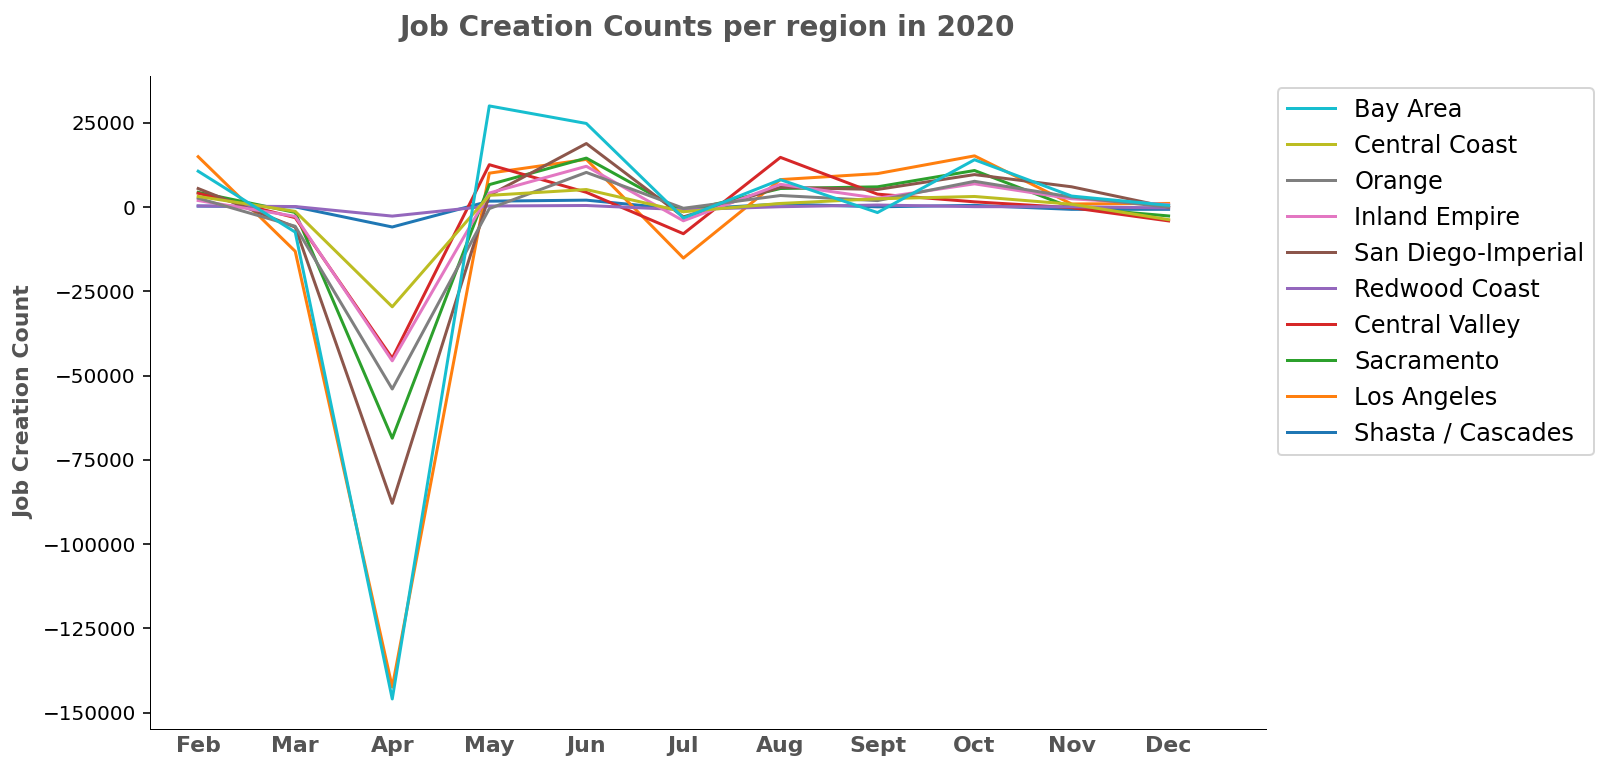

In [73]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(shasta_jc['Job Creation'].values, label='Shasta / Cascades')
ax.plot(la_jc['Job Creation'].values, label='Los Angeles')
ax.plot(sac_jc['Job Creation'].values, label='Sacramento')
ax.plot(cv_jc['Job Creation'].values, label='Central Valley')
ax.plot(rc_jc['Job Creation'].values, label='Redwood Coast')
ax.plot(sd_jc['Job Creation'].values, label='San Diego-Imperial')
ax.plot(ie_jc['Job Creation'].values, label='Inland Empire')
ax.plot(orange_jc['Job Creation'].values, label='Orange')
ax.plot(cc_jc['Job Creation'].values, label='Central Coast')
ax.plot(bay_jc['Job Creation'].values, label='Bay Area')

ax.set_xticklabels(['Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], 
                   fontsize=11, weight='bold', color = '#545454')
ax.set_title('Job Creation Counts per region in 2020', fontsize=14, weight='bold', pad=20, color='#545454')

plt.xticks(np.arange(0, 12, 1.0))
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylabel('Job Creation Count', fontsize=11, weight='bold', color='#545454')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)

plt.show()

## Racial demographics breakdown

# 5/25: have not updated racial demographics breakdown outputs

In [95]:
# do treemap of high wage percentages by race
data_demo = pd.read_csv('data/hw_outputs_w_race_2019.csv')

In [96]:
data_demo.head()

,Industry,Date,County,High Wage Count,Cost of Living,Employment Count,Output Race
0,accounting tax preparation bookkeeping and pay...,2019-01-01,Los Angeles,5394,80216,19421.782564,White
1,accounting tax preparation bookkeeping and pay...,2019-01-01,Los Angeles,5394,80216,19421.782564,White
2,accounting tax preparation bookkeeping and pay...,2019-02-01,Los Angeles,5946,80216,21409.127757,White
3,accounting tax preparation bookkeeping and pay...,2019-02-01,Los Angeles,5946,80216,21409.127757,White
4,accounting tax preparation bookkeeping and pay...,2019-03-01,Los Angeles,6047,80216,21770.463247,White


In [97]:
hw_race = data_demo.groupby(by=["Output Race", "Date"]).sum().groupby(by=['Output Race']).mean()
hw_race['Percentage'] = (hw_race['High Wage Count'] / hw_race['Employment Count']) * 100
hw_race = hw_race.sort_values(by='Percentage')

In [98]:
hw_race

,High Wage Count,Cost of Living,Employment Count,Percentage
Output Race,,,,
Latino,2.789388e+05,46236805.0,6.275548e+06,4.444851
American Indian/Alaska Native,1.183250e+03,9659004.0,2.306607e+04,5.129829
Some other race,1.834167e+03,10172232.0,2.043035e+04,8.977656
Black,7.533633e+04,33189690.0,8.146441e+05,9.247760
Multiracial,5.005008e+04,32275639.0,3.511983e+05,14.251230
Asian,3.401923e+05,39973089.0,2.130753e+06,15.965825
White,1.180669e+06,48313201.0,6.028194e+06,19.585780


In [217]:
# fig, ax = plt.subplots(figsize=(10,6))

# ax.barh(np.arange(7), hw_race['Percentage'].values, color='#85d184')

# ax.set_yticks(np.arange(7))
# ax.set_yticklabels(hw_race.index, fontsize = 12, ha='right')
# ax.tick_params(axis='y',direction='out', pad=10, left=False)

# ax.set_xlabel("% of High Wage Jobs Held", fontsize=12, weight='bold', color = '#545454')
# ax.xaxis.set_label_coords(0.115, -0.12)

# ax.set_title('% of High Wage Jobs Held per Racial Group in 2019', 
#              fontsize=14, weight='bold', pad=20, color='#545454')

# ax.annotate(f"{round(hw_race['Percentage'].values[0], 2)}%", (5, -0.15), size=12, weight='bold', color='#545454', annotation_clip=False)
# ax.annotate(f"{round(hw_race['Percentage'].values[1], 2)}%", (5.6, 0.85), size=12, weight='bold', color='#545454', annotation_clip=False)
# ax.annotate(f"{round(hw_race['Percentage'].values[2], 2)}%", (9.25, 1.85), size=12, weight='bold', color='#545454', annotation_clip=False)
# ax.annotate(f"{round(hw_race['Percentage'].values[3], 2)}%", (9.75, 2.85), size=12, weight='bold', color='#545454', annotation_clip=False)
# ax.annotate(f"{round(hw_race['Percentage'].values[4], 2)}%", (14.75, 3.85), size=12, weight='bold', color='#545454', annotation_clip=False)
# ax.annotate(f"{round(hw_race['Percentage'].values[5], 2)}%", (16.5, 4.85), size=12, weight='bold', color='#545454', annotation_clip=False)
# ax.annotate(f"{round(hw_race['Percentage'].values[6], 2)}%", (20, 5.85), size=12, weight='bold', color='#545454', annotation_clip=False)

# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_linewidth(0.5)
# ax.spines['left'].set_linewidth(0.5)

# plt.show()

In [100]:
hw_race = hw_race.sort_values(by=['High Wage Count'])

In [101]:
hw_race

,High Wage Count,Cost of Living,Employment Count,Percentage
Output Race,,,,
American Indian/Alaska Native,1.183250e+03,9659004.0,2.306607e+04,5.129829
Some other race,1.834167e+03,10172232.0,2.043035e+04,8.977656
Multiracial,5.005008e+04,32275639.0,3.511983e+05,14.251230
Black,7.533633e+04,33189690.0,8.146441e+05,9.247760
Latino,2.789388e+05,46236805.0,6.275548e+06,4.444851
Asian,3.401923e+05,39973089.0,2.130753e+06,15.965825
White,1.180669e+06,48313201.0,6.028194e+06,19.585780


In [218]:
# fig, ax = plt.subplots(figsize=(10,6))

# ax.barh(np.arange(7), hw_race['High Wage Count'].values, color='#85d184')

# ax.set_yticks(np.arange(7))
# ax.set_yticklabels(hw_race.index, fontsize = 12, ha='right')
# ax.tick_params(axis='y',direction='out', pad=10, left=False)

# ax.set_xlabel("Number of High Wage Jobs Held", fontsize=12, weight='bold', color = '#545454')
# ax.xaxis.set_label_coords(0.115, -0.12)
# ax.set_xticklabels(['0', '0.2 M','0.4 M','0.6 M','0.8 M','1 M','1.2 M'], 
#                    fontsize=11, weight='bold', color = '#545454')

# ax.set_title('Number of High Wage Jobs Held per Racial Group in 2019', 
#              fontsize=14, weight='bold', pad=20, color='#545454')

# ax.annotate(f"{int(hw_race['High Wage Count'].values[0])}", (10000, -0.15), size=12, weight='bold', color='#545454', annotation_clip=False)
# ax.annotate(f"{int(hw_race['High Wage Count'].values[1])}", (10000, 0.85), size=12, weight='bold', color='#545454', annotation_clip=False)
# ax.annotate(f"{int(hw_race['High Wage Count'].values[2])}", (60000, 1.85), size=12, weight='bold', color='#545454', annotation_clip=False)
# ax.annotate(f"{int(hw_race['High Wage Count'].values[3])}", (86000, 2.85), size=12, weight='bold', color='#545454', annotation_clip=False)
# ax.annotate(f"{int(hw_race['High Wage Count'].values[4])}", (289000, 3.85), size=12, weight='bold', color='#545454', annotation_clip=False)
# ax.annotate(f"{int(hw_race['High Wage Count'].values[5])}", (350000, 4.85), size=12, weight='bold', color='#545454', annotation_clip=False)
# ax.annotate(f"{int(hw_race['High Wage Count'].values[6])}", (1200000, 5.85), size=12, weight='bold', color='#545454', annotation_clip=False)

# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_linewidth(0.5)
# ax.spines['left'].set_linewidth(0.5)

# plt.show()

In [219]:
# fig = px.treemap(hw_race, 
#                  path=[px.Constant('Total'), hw_race.index], 
#                  values='High Wage Count',
#                 )
# fig.update_traces(root_color='lightgrey')
# fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
# fig.show()

# Multiyear Visualizations

In [220]:
hw_2014 = pd.read_csv('data/outputs/hw_outputs_2014.csv')
hw_2015 = pd.read_csv('data/outputs/hw_outputs_2015.csv')
hw_2016 = pd.read_csv('data/outputs/hw_outputs_2016.csv')
hw_2017 = pd.read_csv('data/outputs/hw_outputs_2017.csv')
hw_2018 = pd.read_csv('data/outputs/hw_outputs_2018.csv')
hw_2019 = pd.read_csv('data/outputs/hw_outputs_2019.csv')
hw_2020 = pd.read_csv('data/outputs/hw_outputs_2020.csv')

In [221]:
hw_multiyear = pd.concat([hw_2014, hw_2015, hw_2016, hw_2017, hw_2018, hw_2019, hw_2020])

In [222]:
hw_multiyear.head()

,Industry,Date,Region,High Wage Count,Employment Count,Cost of Living
0,accommodation and food services,2014-01-01,Inland Empire,12184,123200.0,59437
1,accommodation and food services,2014-02-01,Inland Empire,12352,124900.0,59437
2,accommodation and food services,2014-03-01,Inland Empire,12490,126300.0,59437
3,accommodation and food services,2014-04-01,Inland Empire,12550,126900.0,59437
4,accommodation and food services,2014-05-01,Inland Empire,12659,128000.0,59437


In [223]:
hw_state = hw_multiyear.groupby(by=["Date"]).sum()
hw_state['Percentage'] = (hw_state['High Wage Count'] / hw_state['Employment Count']) * 100

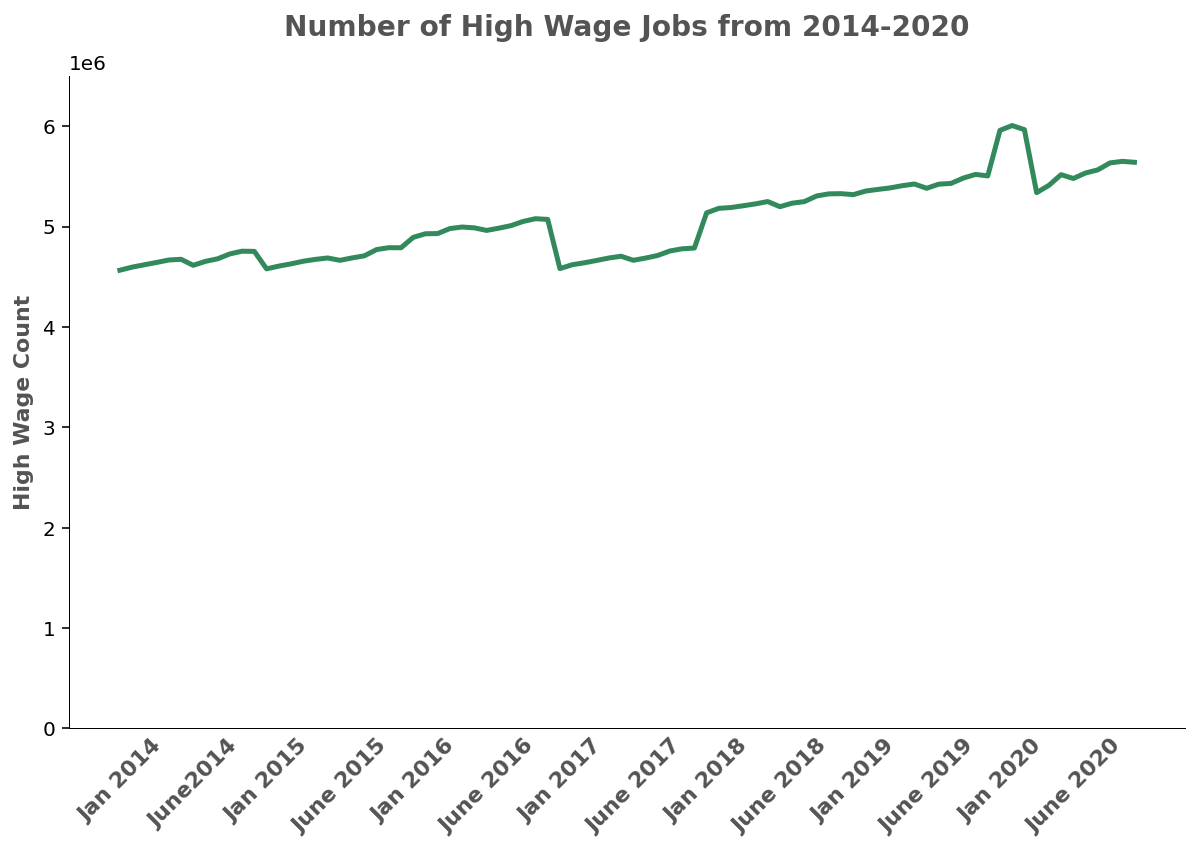

In [226]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(hw_state['High Wage Count'].values, lw=2.5, color='#328a5c')

ax.set_xticklabels(['Jan 2014', 'June2014', 'Jan 2015', 'June 2015', 'Jan 2016', 'June 2016', 
                    'Jan 2017', 'June 2017', 'Jan 2018', 'June 2018', 
                    'Jan 2019', 'June 2019', 'Jan 2020', 'June 2020'], 
                   fontsize=11, weight='bold', color = '#545454', rotation = 45)
ax.set_title('Number of High Wage Jobs from 2014-2020', fontsize=14, weight='bold', pad=20, color='#545454')

plt.xticks(np.arange(0, 84, 6))
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylabel('High Wage Count', fontsize=11, weight='bold', color='#545454')

ax.set_ylim(0,6.5e+6)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

plt.show()

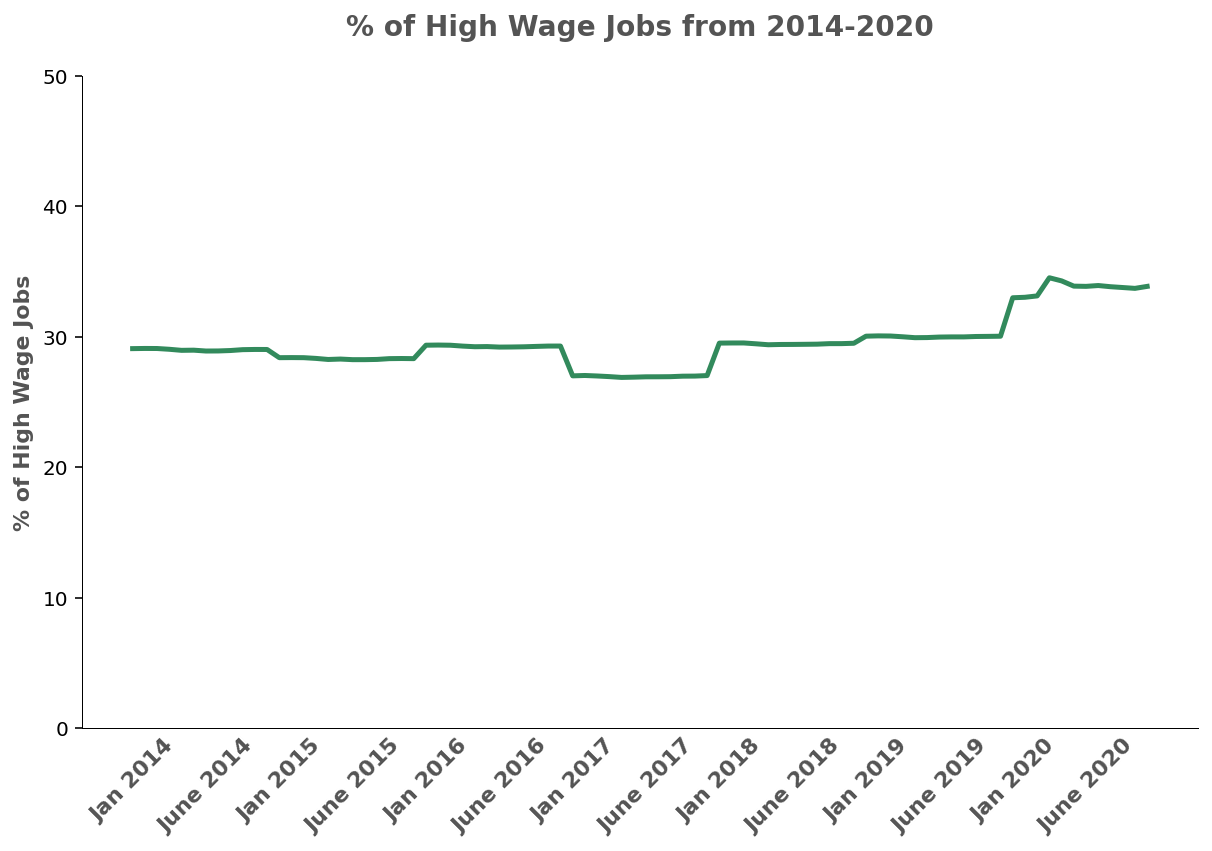

In [227]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(hw_state['Percentage'].values, lw=2.5, color='#328a5c')

ax.set_xticklabels(['Jan 2014', 'June 2014', 'Jan 2015', 'June 2015', 'Jan 2016', 'June 2016', 
                    'Jan 2017', 'June 2017', 'Jan 2018', 'June 2018', 
                    'Jan 2019', 'June 2019', 'Jan 2020', 'June 2020'], 
                   fontsize=11, weight='bold', color = '#545454', rotation = 45)
ax.set_title('% of High Wage Jobs from 2014-2020', fontsize=14, weight='bold', pad=20, color='#545454')

plt.xticks(np.arange(0, 84, 6))
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylabel('% of High Wage Jobs', fontsize=11, weight='bold', color='#545454')

ax.set_ylim(0,50)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

plt.show()

## Job Creation over 2014-2020

In [84]:
data_jobcreation = hw_multiyear.groupby(by=['Region', 'Date']).sum()[['High Wage Count']]
data_jobcreation['Job Creation'] = data_jobcreation['High Wage Count'].diff()
data_jobcreation = data_jobcreation.reset_index()
data_jobcreation = data_jobcreation.loc[data_jobcreation['Date'] != '2014-01-01']
data_jobcreation.head()

,Region,Date,High Wage Count,Job Creation
0,Bay Area,2015-01-01,1028389,NaN
1,Bay Area,2015-02-01,1033396,5007.0
2,Bay Area,2015-03-01,1038823,5427.0
3,Bay Area,2015-04-01,1045503,6680.0
4,Bay Area,2015-05-01,1050553,5050.0


In [85]:
shasta_jc = data_jobcreation.loc[data_jobcreation['Region'] == 'Shasta / Cascades']
cv_jc = data_jobcreation.loc[data_jobcreation['Region'] == 'Central Valley']
rc_jc = data_jobcreation.loc[data_jobcreation['Region'] == 'Redwood Coast']
sd_jc = data_jobcreation.loc[data_jobcreation['Region'] == 'San Diego-Imperial']
orange_jc = data_jobcreation.loc[data_jobcreation['Region'] == 'Orange']
ie_jc = data_jobcreation.loc[data_jobcreation['Region'] == 'Inland Empire']
cc_jc = data_jobcreation.loc[data_jobcreation['Region'] == 'Central Coast']
bay_jc = data_jobcreation.loc[data_jobcreation['Region'] == 'Bay Area']
sac_jc = data_jobcreation.loc[data_jobcreation['Region'] == 'Sacramento']
la_jc = data_jobcreation.loc[data_jobcreation['Region'] == 'Los Angeles']

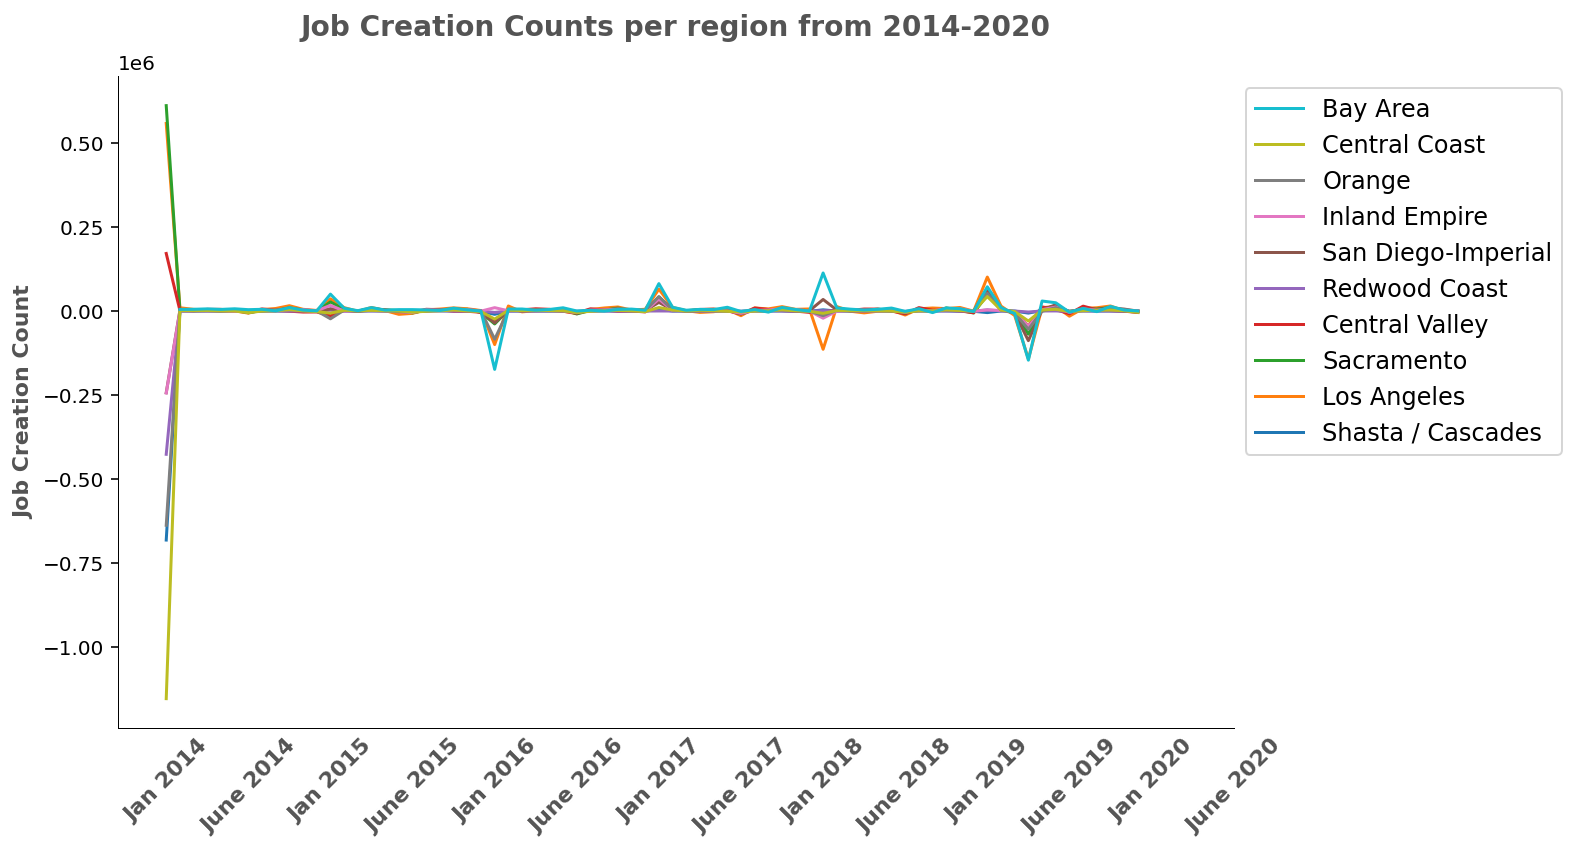

In [87]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(shasta_jc['Job Creation'].values, label='Shasta / Cascades')
ax.plot(la_jc['Job Creation'].values, label='Los Angeles')
ax.plot(sac_jc['Job Creation'].values, label='Sacramento')
ax.plot(cv_jc['Job Creation'].values, label='Central Valley')
ax.plot(rc_jc['Job Creation'].values, label='Redwood Coast')
ax.plot(sd_jc['Job Creation'].values, label='San Diego-Imperial')
ax.plot(ie_jc['Job Creation'].values, label='Inland Empire')
ax.plot(orange_jc['Job Creation'].values, label='Orange')
ax.plot(cc_jc['Job Creation'].values, label='Central Coast')
ax.plot(bay_jc['Job Creation'].values, label='Bay Area')

ax.set_xticklabels(['Jan 2014', 'June 2014', 'Jan 2015', 'June 2015', 'Jan 2016', 'June 2016', 
                    'Jan 2017', 'June 2017', 'Jan 2018', 'June 2018', 
                    'Jan 2019', 'June 2019', 'Jan 2020', 'June 2020'], 
                   fontsize=11, weight='bold', color = '#545454', rotation = 45)
ax.set_title('Job Creation Counts per region from 2014-2020', fontsize=14, weight='bold', pad=20, color='#545454')

plt.xticks(np.arange(0, 84, 6.0))
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylabel('Job Creation Count', fontsize=11, weight='bold', color='#545454')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)

plt.show()

## Multiyear Race Visualizations

# not updated

In [167]:
hw_race_5year = pd.read_csv('data/outputs/hw_outputs_w_race_5year.csv')

In [172]:
r1_data = hw_race_5year.loc[hw_race_5year['Output Race'] == 'White']
r2_data = hw_race_5year.loc[hw_race_5year['Output Race'] == 'Black']
r3_data = hw_race_5year.loc[hw_race_5year['Output Race'] == 'Latino']
r4_data = hw_race_5year.loc[hw_race_5year['Output Race'] == 'Asian']
r5_data = hw_race_5year.loc[hw_race_5year['Output Race'] == 'American Indian/Alaska Native']
r6_data = hw_race_5year.loc[hw_race_5year['Output Race'] == 'Some other race']
r7_data = hw_race_5year.loc[hw_race_5year['Output Race'] == 'Multiracial']

In [173]:
r1_data = r1_data.groupby(by=["Date"]).sum()
r1_data['Percentage'] = (r1_data['High Wage Count'] / r1_data['Employment Count']) * 100
r2_data = r2_data.groupby(by=["Date"]).sum()
r2_data['Percentage'] = (r2_data['High Wage Count'] / r2_data['Employment Count']) * 100
r3_data = r3_data.groupby(by=["Date"]).sum()
r3_data['Percentage'] = (r3_data['High Wage Count'] / r3_data['Employment Count']) * 100
r4_data = r4_data.groupby(by=["Date"]).sum()
r4_data['Percentage'] = (r4_data['High Wage Count'] / r4_data['Employment Count']) * 100
r5_data = r5_data.groupby(by=["Date"]).sum()
r5_data['Percentage'] = (r5_data['High Wage Count'] / r5_data['Employment Count']) * 100
r6_data = r6_data.groupby(by=["Date"]).sum()
r6_data['Percentage'] = (r6_data['High Wage Count'] / r6_data['Employment Count']) * 100
r7_data = r7_data.groupby(by=["Date"]).sum()
r7_data['Percentage'] = (r7_data['High Wage Count'] / r7_data['Employment Count']) * 100

In [228]:
# fig, ax = plt.subplots(figsize=(10,6))
# ax.plot(r1_data['Percentage'].values, lw=2.5, label='White')
# ax.plot(r2_data['Percentage'].values, lw=2.5, label='Black')
# ax.plot(r3_data['Percentage'].values, lw=2.5, label='Latino')
# ax.plot(r4_data['Percentage'].values, lw=2.5, label='Asian')
# ax.plot(r5_data['Percentage'].values, lw=2.5, label='American Indian/Alaska Native')
# ax.plot(r6_data['Percentage'].values, lw=2.5, label='Some other race')
# ax.plot(r7_data['Percentage'].values, lw=2.5, label='Multiracial')

# ax.set_xticklabels(['Jan 2015', 'June 2015', 'Jan 2016', 'June 2016', 
#                     'Jan 2017', 'June 2017', 'Jan 2018', 'June 2018', 
#                     'Jan 2019', 'June 2019', 'Jan 2020', 'June 2020'], 
#                    fontsize=11, weight='bold', color = '#545454', rotation = 45)
# ax.set_title('% of High Wage Jobs per racial group from 2015-2020', 
#              fontsize=14, weight='bold', pad=20, color='#545454')

# plt.xticks(np.arange(0, 72, 6.0))
# ax.tick_params(axis='x', which='both', length=0)
# ax.set_ylabel('% of High Wage Jobs', fontsize=11, weight='bold', color='#545454')

# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_linewidth(0.5)
# ax.spines['left'].set_linewidth(0.5)

# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)

# plt.show()

In [229]:
# fig, ax = plt.subplots(figsize=(10,6))
# ax.plot(r1_data['High Wage Count'].values, lw=2.5, label='White')
# ax.plot(r2_data['High Wage Count'].values, lw=2.5, label='Black')
# ax.plot(r3_data['High Wage Count'].values, lw=2.5, label='Latino')
# ax.plot(r4_data['High Wage Count'].values, lw=2.5, label='Asian')
# ax.plot(r5_data['High Wage Count'].values, lw=2.5, label='American Indian/Alaska Native')
# ax.plot(r6_data['High Wage Count'].values, lw=2.5, label='Some other race')
# ax.plot(r7_data['High Wage Count'].values, lw=2.5, label='Multiracial')

# ax.set_xticklabels(['Jan 2015', 'June 2015', 'Jan 2016', 'June 2016', 
#                     'Jan 2017', 'June 2017', 'Jan 2018', 'June 2018', 
#                     'Jan 2019', 'June 2019', 'Jan 2020', 'June 2020'], 
#                    fontsize=11, weight='bold', color = '#545454', rotation = 45)
# ax.set_title('Number of High Wage Jobs per racial group from 2015-2020', 
#              fontsize=14, weight='bold', pad=20, color='#545454')

# plt.xticks(np.arange(0, 72, 6.0))
# ax.tick_params(axis='x', which='both', length=0)
# ax.set_ylabel('High Wage Count', fontsize=11, weight='bold', color='#545454')

# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_linewidth(0.5)
# ax.spines['left'].set_linewidth(0.5)

# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)

# plt.show()